<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Credit_Scoring_and_Risk_Analysis_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Credit scoring menjelaskan tentang teknik perhitungan atau prediksi untuk mengevaluasi resiko kredit didalam perusahaan yang memberikan informasi secara kontiniu dan menunjukkan track dan histori dalam perilaku sistem kredit dan memberikan informasi model bisnis mereka.

Pengkreditan score biasanya dilakukan oleh perusahaan bank, fintech, pinjaman, atau lembaga keuangan lainnya.

Dalam pengkreditan score ini dibuat pendekatan secara statistik dan matematik dalam perhitungan dan memprediksi dan memahami karakteristik infornasi atau data.

Berikut pentingnya dalam melakukan analisis credit scoring:
1. Proses yang cepat dan efisien yang memungkinkan perusahaan dapat melakukan evaluasi berupa penilaian model dan riwayat secara otomatis.
2. Meminimalisir resiko kredit yang macet untuk memberikan wawasan tentang indikasi seberapa besar kemungkinan peminjam akan mengalami masalah saat pembayaran. Hal ini bisa membantu dalam mempertimbangkan dan membuat keputusan yang lebih informasional dan mengurangi resiko kerugian.
3. Memberikan presisi dan akurasi penilaian yang melakukan pendekatan model statistik dan matematika dalam melakukan analisis dan perhitungan data untuk evaluasi resiko kredit. Proses ini dilakukan dengan penilaian yang akurat dan prediktif model untuk mengatasi bias dan kesalahan penilaian.
4. Membuka akses ke jaringan nasabah yang lebih luas dalam mempermudah peminjaman dan memiliki rekam jejak kredit dan mendapatkan suku bunga yang lebih kompetitif dalam memfalitasi pertumbuhan ekonomi memberikan kesempatan bagi individu dan usaha kecil untuk mendapatkan modal yang dibutuhkan.

# Data Collection

* Mengumpulkan data yang relevan seperti applicant information, credit history, and financial status.


# Data Preprocessing and Exploratory Data Analysis (EDA)

* Analisis dari kumpulan data dalam melakukan analitik data dengan menangani nilai yang hilang, normaisasikan, transformasi dan melakukan feature selection atau feature engineering, data splitting pada categories feature.

* visualisasikan feature dalam menemukan perbandingan, distribusi, dan proporsional data

# Model Development
 * mengembangkan model dalam prediksi model dengan pemilihan fitur.
 * menggunakan pelatihan dan pengujian data dengan model Logistics Regression.



# Binning and Scorecard Creation.

* menggunakan OptimalBinning untuk mengelompokkan variabel kontinu dan membuatnya mudah dalam interpretasi.
* mengembangkan Scoring dengan Scorecard menetapkan skor risiko berdasarkan fitur yang dikelompokkan.

# Model Calibration and Evaluation

* menggunakan CalibratedClassifierCV untuk mengestimasi probabilitas yang lebih baik
* melakukan evaluasi model performance menggunakan metrik seperti brier_score_loss dan menvisualisasikan dalam melihat pola dan trend yang ditunjukkan dalam mempermudah dalam melakukan interpretasi.

# Monitoring and Maintenance

* Menerapkan pemantauan dengan ScorecardMonitoring untuk memastikan kartu skor tetap relevan dan akurat dari waktu ke waktu

Dengan memadukan berbagai alat dan teknik ini, Anda dapat membangun sistem penilaian kredit yang kuat yang menilai risiko secara akurat sekaligus memberikan wawasan yang jelas dan dapat ditindaklanjuti. Hal ini penting bagi lembaga dan organisasi keuangan yang terlibat dalam peminjaman dan manajemen risiko.

In [ ]:
pip install optbinning

In [ ]:
pip install category_encoders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score, brier_score_loss, roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay


from optbinning import OptimalBinning
from optbinning import Scorecard
from optbinning.scorecard import ScorecardMonitoring
from optbinning import BinningProcess
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

# pd.set_option('display.max_rows', None)
# sns.set_style("whitegrid")

plt.style.use('ggplot')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
df = pd.read_excel('/content/processed_credit_data.xlsx')
df.head()

Unnamed: 0  checking_balance  months_loan_duration credit_history  \
0           0        -43.000000                     6       critical   
1           1         75.000000                    48         repaid   
2           2         97.245875                    12       critical   
3           3        -32.000000                    42         repaid   
4           4        -23.000000                    24        delayed   

     purpose  amount  savings_balance  installment_rate personal_status  \
0   radio/tv    1169       781.570379                 4          single   
1   radio/tv    5951        89.000000                 2         Unknown   
2  education    2096        24.000000                 2          single   
3  furniture    7882         9.000000                 2          single   
4  car (new)    4870        43.000000                 3          single   

  other_debtors  ... installment_plan   housing existing_credits default  \
0          none  ...             none       own                2       0   
1          none  ...             none       own                1       1   
2          none  ...             none       own                1       0   
3     guarantor  ...             none  for free                1       0   
4          none  ...             none  for free                2       1   

   dependents  foreign_worker                 job  gender  \
0           1             yes    skilled employee    male   
1           1             yes    skilled employee  female   
2           2             yes  unskilled resident    male   
3           2             yes    skilled employee    male   
4           2             yes    skilled employee    male   

  employment_length_years residence_history_years  
0                    13.0                6.000000  
1                     2.0                0.416667  
2                     5.0                4.000000  
3                     5.0               13.000000  
4                     3.0               13.000000  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   checking_balance         1000 non-null   float64
 2   months_loan_duration     1000 non-null   int64  
 3   credit_history           1000 non-null   object 
 4   purpose                  1000 non-null   object 
 5   amount                   1000 non-null   int64  
 6   savings_balance          1000 non-null   float64
 7   installment_rate         1000 non-null   int64  
 8   personal_status          1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  property                 1000 non-null   object 
 11  age                      1000 non-null   int64  
 12  installment_plan         1000 non-null   object 
 13  housing                  1000 non-null   object 
 14  existing_credits         

In [ ]:
df.describe()

Unnamed: 0  checking_balance  months_loan_duration        amount  \
count  1000.000000       1000.000000           1000.000000   1000.000000   
mean    499.500000         97.245875             20.903000   3271.258000   
std     288.819436        161.029310             12.058814   2822.736876   
min       0.000000        -50.000000              4.000000    250.000000   
25%     249.750000         -5.250000             12.000000   1365.500000   
50%     499.500000         97.245875             18.000000   2319.500000   
75%     749.250000         97.245875             24.000000   3972.250000   
max     999.000000        999.000000             72.000000  18424.000000   

       savings_balance  installment_rate          age  existing_credits  \
count      1000.000000       1000.000000  1000.000000       1000.000000   
mean        781.570379          2.973000    35.546000          1.407000   
std        2726.687149          1.118715    11.375469          0.577654   
min           0.000000          1.000000    19.000000          1.000000   
25%          38.000000          2.000000    27.000000          1.000000   
50%          82.500000          3.000000    33.000000          1.000000   
75%         781.570379          4.000000    42.000000          2.000000   
max       19972.000000          4.000000    75.000000          4.000000   

           default   dependents  employment_length_years  \
count  1000.000000  1000.000000              1000.000000   
mean      0.300000     1.155000                 5.129583   
std       0.458487     0.362086                 5.151840   
min       0.000000     1.000000                 0.000000   
25%       0.000000     1.000000                 1.000000   
50%       0.000000     1.000000                 3.000000   
75%       1.000000     1.000000                 7.000000   
max       1.000000     2.000000                19.000000   

       residence_history_years  
count              1000.000000  
mean                  7.085833  
std                   7.473123  
min                   0.000000  
25%                   0.750000  
50%                   4.000000  
75%                  13.000000  
max                  24.000000

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

checking_balance  months_loan_duration credit_history     purpose  \
0          -43.000000                     6       critical    radio/tv   
1           75.000000                    48         repaid    radio/tv   
2           97.245875                    12       critical   education   
3          -32.000000                    42         repaid   furniture   
4          -23.000000                    24        delayed   car (new)   
..                ...                   ...            ...         ...   
995         97.245875                    12         repaid   furniture   
996        -30.000000                    30         repaid  car (used)   
997         97.245875                    12         repaid    radio/tv   
998        -18.000000                    45         repaid    radio/tv   
999        194.000000                    45       critical  car (used)   

     amount  savings_balance  installment_rate personal_status other_debtors  \
0      1169       781.570379                 4          single          none   
1      5951        89.000000                 2         Unknown          none   
2      2096        24.000000                 2          single          none   
3      7882         9.000000                 2          single     guarantor   
4      4870        43.000000                 3          single          none   
..      ...              ...               ...             ...           ...   
995    1736        48.000000                 3         Unknown          none   
996    3857        20.000000                 4        divorced          none   
997     804        44.000000                 4          single          none   
998    1845        31.000000                 4          single          none   
999    4576       128.000000                 3          single          none   

                     property  ...  installment_plan   housing  \
0                 real estate  ...              none       own   
1                 real estate  ...              none       own   
2                 real estate  ...              none       own   
3    building society savings  ...              none  for free   
4                unknown/none  ...              none  for free   
..                        ...  ...               ...       ...   
995               real estate  ...              none       own   
996  building society savings  ...              none       own   
997                     other  ...              none       own   
998              unknown/none  ...              none  for free   
999                     other  ...              none       own   

    existing_credits  default  dependents  foreign_worker  \
0                  2        0           1             yes   
1                  1        1           1             yes   
2                  1        0           2             yes   
3                  1        0           2             yes   
4                  2        1           2             yes   
..               ...      ...         ...             ...   
995                1        0           1             yes   
996                1        0           1             yes   
997                1        0           1             yes   
998                1        1           1             yes   
999                1        0           1             yes   

                         job  gender employment_length_years  \
0           skilled employee    male                    13.0   
1           skilled employee  female                     2.0   
2         unskilled resident    male                     5.0   
3           skilled employee    male                     5.0   
4           skilled employee    male                     3.0   
..                       ...     ...                     ...   
995       unskilled resident  female                     4.0   
996  mangement self-employed    male                     3.0   
997         skilled employee    male                 

In [ ]:
df1 = df.copy()

In [ ]:
df1.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'installment_rate', 'personal_status',
       'other_debtors', 'property', 'age', 'installment_plan', 'housing',
       'existing_credits', 'default', 'dependents', 'foreign_worker', 'job',
       'gender', 'employment_length_years', 'residence_history_years'],
      dtype='object')

In [ ]:
df1.isnull().sum()

checking_balance           0
months_loan_duration       0
credit_history             0
purpose                    0
amount                     0
savings_balance            0
installment_rate           0
personal_status            0
other_debtors              0
property                   0
age                        0
installment_plan           0
housing                    0
existing_credits           0
default                    0
dependents                 0
foreign_worker             0
job                        0
gender                     0
employment_length_years    0
residence_history_years    0
dtype: int64

In [ ]:
# Installment Rate Amount
df1['installment_rate_amount'] = df1['installment_rate'] * df1['amount']

# Saving to Amount Ratio
df1['saving_to_amount_ration'] = df1['savings_balance'] / (df1['amount'] + 1)

# Months Loan Duration
df1['months_loan_duration'] = pd.to_numeric(df1['months_loan_duration'], errors='coerce')

# Employment Length in Years
df1['employment_length_years'] = pd.to_numeric(df1['employment_length_years'], errors='coerce')

# Loan Duration to Employment Length Ratio
df1['loan_duration_to_employment_length'] = df1['months_loan_duration'] / (df1['employment_length_years'] + 1)

# Existing Credits to Age Ratio
df1['existing_credits_to_age'] = df1['existing_credits'] / (df1['age'] + 1)

# Amount to Years at Residence Ratio:
df1['amount_to_years_at_residence'] = df1['amount'] / (df1['residence_history_years'] + 1)

# Loan Duration to Years at Residence Ratio
df1['loan_duration_to_years_at_residence'] = df1['months_loan_duration'] / (df1['residence_history_years'] + 1)

# Years at Residence per Month of Loan Duration
df1['years_at_residence_per_month_of_loan_duration'] = df1['residence_history_years'] / (df1['months_loan_duration'] / 12 + 1)
df1.head(5)

checking_balance  months_loan_duration credit_history    purpose  amount  \
0        -43.000000                     6       critical   radio/tv    1169   
1         75.000000                    48         repaid   radio/tv    5951   
2         97.245875                    12       critical  education    2096   
3        -32.000000                    42         repaid  furniture    7882   
4        -23.000000                    24        delayed  car (new)    4870   

   savings_balance  installment_rate personal_status other_debtors  \
0       781.570379                 4          single          none   
1        89.000000                 2         Unknown          none   
2        24.000000                 2          single          none   
3         9.000000                 2          single     guarantor   
4        43.000000                 3          single          none   

                   property  ...  gender employment_length_years  \
0               real estate  ...    male                    13.0   
1               real estate  ...  female                     2.0   
2               real estate  ...    male                     5.0   
3  building society savings  ...    male                     5.0   
4              unknown/none  ...    male                     3.0   

  residence_history_years  installment_rate_amount  saving_to_amount_ration  \
0                6.000000                     4676                 0.668009   
1                0.416667                    11902                 0.014953   
2                4.000000                     4192                 0.011445   
3               13.000000                    15764                 0.001142   
4               13.000000                    14610                 0.008828   

   loan_duration_to_employment_length existing_credits_to_age  \
0                            0.428571                0.029412   
1                           16.000000                0.043478   
2                            2.000000                0.020000   
3                            7.000000                0.021739   
4                            6.000000                0.037037   

  amount_to_years_at_residence loan_duration_to_years_at_residence  \
0                   167.000000                            0.857143   
1                  4200.705882                           33.882353   
2                   419.200000                            2.400000   
3                   563.000000                            3.000000   
4                   347.857143                            1.714286   

   years_at_residence_per_month_of_loan_duration  
0                                       4.000000  
1                                       0.083333  
2                                       2.000000  
3                                       2.888889  
4                                       4.333333  

[5 rows x 28 columns]

## illustration

1.   Jumlah Tingkat Angsuran:
Menghitung Jumlah pembayaran total per angsuran dengan mengalikan **Installment_rate** dengan **amount**
2.   Rasio Tabungan Terhadap Jumlah:
Menghitung rasio **savings_balance** terhadap **amount**, dan menambahkan 1 untuk menghindari pembagian dengan nol.
3.   Durasi Pinjaman Bulan dan Lamanya Pekerjaan:
Mengkonversikan **months_loan_duration** dan **employment_length_years** menjadi numerik, memaksa semua nilai non-numerik menjadi NaN.
4.    Rasio Durasi Pinjaman Terhadap Lamanya Pekerjaan:
Menghitung rasio durasi pinjaman (dalam bulan) terhadap lamanya masa kerja, menyesuaikan pembagian dengan nol.
5.    Rasio Kredit yang Ada Terhadap Usia:
Menghitung rasio **exixting_credits** terhadap **age**, dan menambahkan 1 untuk keamanan dalam pembagian
6.    Rasio Jumlah Terhadap Tahun Tinggal:
Mengevaluasi bagaimana pinjaman **amount** berhubungan dengan jumlah tahun di tempat tinggal saat ini.
7.    Rasio Durasi Pinjaman Terhadap Tahun Tinggal di Tempat Tinggal:
Menghitung rasio durasi pinjaman terhadap tahun di tempat tinggal.
8.    Tahun di Tempat Tinggal Per Bulan Durasi Pinjaman:
Menghitung jumlah tahun tinggal di tempat tinggal per bulan durasi pinjaman, mengubah bulan menjadi tahun.



In [ ]:
df2 = df1.copy()

## Data Splitting

In [ ]:
x = df1.drop(columns=['default'])
y = df1['default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)
print('Train Features: {}, Train Target: {}'.format(x_train.shape, y_train.shape))
print('Test Features: {}, Test Target: {}'.format(x_test.shape, y_test.shape))

Train Features: (700, 27), Train Target: (700,)
Test Features: (300, 27), Test Target: (300,)


In [ ]:
cat_feature = x.select_dtypes(include=['object', 'category']).columns.tolist()
num_feature = x.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
variabel_name = x_train.columns[:].tolist()
variabel_name

['checking_balance',
 'months_loan_duration',
 'credit_history',
 'purpose',
 'amount',
 'savings_balance',
 'installment_rate',
 'personal_status',
 'other_debtors',
 'property',
 'age',
 'installment_plan',
 'housing',
 'existing_credits',
 'dependents',
 'foreign_worker',
 'job',
 'gender',
 'employment_length_years',
 'residence_history_years',
 'installment_rate_amount',
 'saving_to_amount_ration',
 'loan_duration_to_employment_length',
 'existing_credits_to_age',
 'amount_to_years_at_residence',
 'loan_duration_to_years_at_residence',
 'years_at_residence_per_month_of_loan_duration']

## Key Benefits of **OptBinning** In Credit Scoring:

1.  **Optimal Risk Classification**. Membantu dalam membuat kelompok yang secara akurat merefleksikan profil resiko peminjaman. Hal ini memungkinkan pemberi pinjaman untuk mengklasifikasikan pemohon ke dalam kategori resiko yang berbeda secara lebih efektif.
2.  **Data-Driven Binning.** menggunakan metode statistik untuk menentukan batas pengelompokan terbaik berdasarkan distribusi data aktual dan menghasilkan pengelompokan yang lebih bermakna dengan meningkatkan kinerja model.
3.  **Improved Predictive Accuracy.** Mampu untuk menangkap hubungan kompleks antara karakteristrik peminjaman (seperti riwayat kredit, pendapatan, dan utang) dan kemungkinan gagal bayar, sehingga meningkatkan daya prediktif model penilaian.
4.  **Outlier Management.** Mampu menangani outlier secara efektif dengan menempatkannya dalam wadah terpisah, yang mencegah hasil yang bias dan memastikan model tetap akurat.
5.  **Interpretability and Transparency.** Variabel yang dikelompokkan dapat lebih mudah dipahami dan dijelaskan, sehingga lebih mudah untuk memahami alasan dibalik keputusan kredit.
6. **Handling Imbalanced Datasets.** Mampu membantu menciptakan kumpulan data yang lebih efektif yang lebih menggambarkan distribusi resiko, membantu dalam mengidentifikasikan pemohon yang berisiko tinggi.
7. **Regulatory Compliance.** Mendukung kepatuhan terhadap peraturan yang memerlukan transparansi dalam proses penilaian kredit.
8.  **Noise Reduction.** Mampu dalam mengurangi dampak kebisingan pada data, sehingga menghasilkan skor kredit yang lebih stabil dan dapat diandalkan.
9.  **Facilitating Model Updates.** Mampu dalam beradaptasi dengan data baru yang memungkinkan pembaruan rutin pada model penilaian kredit untuk menjaga efektivitasnya.
10. **Model Integration.** Memberikan peningkatan dalam proses rekayasa fitur, dan diintegrasikan dengan teknik pemodelan yang tepat untuk memaksimalkan manfaatnya.
11. **Data Quality.** Bergantung pada kualitas data input. Data yang tidak akurat atau tidak lengkap akan menyebabkan batas bin yang menyesatkan.
12. **Validation and Testing.** Metode ini memberikan hasil proses binning guna memastikan bahwa proses tersebut meningkatkan kinerja model dan membantu menilai dampaknya.

## Selection Criteria

In [ ]:
selection_criteria = {'iv': {'min': 0.02, 'max': 0.6, 'strategy': 'highest', 'top': 9}, # iv (merupakan information value dengan strategi memilih variabel dengan min 0.02 dan max 0.5 sebanyak 9 variabel teratas)
                      'quality_score': {'min': 0.01},
                      'gini': {'min': 0.02}}

## Binning Process and Fitting Proses Binning

In [ ]:
binning_process = BinningProcess(variable_names = variabel_name, # daftar nama variabel (disimpan dalam variabel_name)
                                 categorical_variables = cat_feature, # daftar variabel kategorikal (disimpan dalam cat_feature)
                                 special_codes = [], # daftar kosong untuk kode khusus
                                 selection_criteria = selection_criteria, # kriteria pemilihan yang telah didefenisikan
                                 min_n_bins = 2, # minimun jumlah bin
                                 max_n_bins = 8) # maximum jumlah bin

binning_process.fit(x_train, y_train) # memanggil metode fit untuk menerapkan proses binning pada data training

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

BinningProcess(categorical_variables=['credit_history', 'purpose',
                                      'personal_status', 'other_debtors',
                                      'property', 'installment_plan', 'housing',
                                      'foreign_worker', 'job', 'gender'],
               max_n_bins=8, min_n_bins=2,
               selection_criteria={'gini': {'min': 0.02},
                                   'iv': {'max': 0.6, 'min': 0.02,
                                          'strategy': 'highest', 'top': 9},
                                   'quality_score': {'min': 0.01}},
               special_codes=[],
               variable...
                               'age', 'installment_plan', 'housing',
                               'existing_credits', 'dependents',
                               'foreign_worker', 'job', 'gender',
                               'employment_length_years',
                               'residence_history_years',
                               'installment_rate_amount',
                               'saving_to_amount_ration',
                               'loan_duration_to_employment_length',
                               'existing_credits_to_age',
                               'amount_to_years_at_residence',
                               'loan_duration_to_years_at_residence',
                               'years_at_residence_per_month_of_loan_duration'])

## Insights:

* **Fokus Pada Pemilihan Variabel.** Penggunaan Nilai Informasi, skor kualitas, dan koefisien Gini sebagai kriteria pemilihan menekankan bahwa pentingnya **Feature Selection** dalam membangun **Predictive Models**. Hal ini memastikan bahwa hanya variabel yang paling relevan yang disertakan yang mana berpotensi meningkatkan **Model Performance.**

* **Strategi Diskritisasi.** Proses pengelompokan dirancang untuk mengubah variabel kontinu menjadi pengelompokan diskrit. Hal ini dapat membantu dalam menangkap hubungan non-linear dan mengurangi dampak outlier sehingga data lebih sesuai untuk jenis model tertentu.

* **Kontrol Parameter.** yaitu menentukan batas bin minimum dan maksimum memungkinkan fleksibilitas dalam cara data disegmentasi. Hal ini dapat membantu menyeimbangkan antara bin yang terlalu sedikit (yang dapat menyederhanakan data secara berlebihan) dan bin yang terlalu banyak (yang dapat menyebabkan overvitting).

* **Penanganan Variabel Ketegorical.** Dimasukkan variabel kategoris menunjukkan bahwa proses tersebut dilengkapi untuk menangani berbagai jenis data, yang penting dalam memastikan analisis yang lebih komprehensif.

## Outcomes

* **Peningkatan Interpretabilitas Model.** Dengan membuat bin, fitur yang dihasilkan seringkali lebih mudah diinterpretasi, sehingga seseorang dapat memahami proses pengambilan keputusan model dengan lebih jelas.

* **Potensi Peningkatan Model Performence.** Pemilihan variabel yang cermat dan diskritisasi dapat menghasilkan akurasi dan ketahanan model prediktif yang lebih baik. Fitur relevan dengan skor **Information Value** dan **Gini** yang tinggi cenderung memberikan kontribusi positif terhadap hasil model prediktif.

* **Transformasi Data Siap Untuk Pemodelan.** Setelah proses binning selesai, data yang telah ditransformasi siap untuk langkah pemodelan lanjut. Ini mempersiapkan kumpulan data untuk pemasangan algoritma model yang memanfaatkan masukan terdiskritisasi, sehingga memudahkan pelatihan dan evaluasi yang lebih baik.

* **Identifikasi Key Feature.** Proses ini akan menyoroti fitur mana yang paling informatif berdasarkan kriteria yang ditentukan, membantu dalam Feature Engineering dan berpotensi memandu upaya pengumpulan data.

In [ ]:
# Variable Initialization
charr = []
information_value = []


# Retrieving Supported Variables
variabel = binning_process.get_support(names=True)

# Calculating Information Value:
for variable in variabel:
  binning_table = binning_process.get_binned_variable(variable).binning_table
  charr.append(variable)
  information_value.append(binning_table.build().loc['Totals', 'IV'])

# Create a DataFrame
iv_df = pd.DataFrame({'Characteristics': charr,
                      'Information Value': information_value})

#  Sorting the DataFrame
iv_df = iv_df.sort_values(by='Information Value', ascending=False)
iv_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Characteristics  Information Value
0                    checking_balance           0.589349
2                      credit_history           0.368192
5             saving_to_amount_ration           0.262900
1                months_loan_duration           0.258713
6  loan_duration_to_employment_length           0.243317
4                     savings_balance           0.233238
3                             purpose           0.229283

In [ ]:
# Interpreting Information Value
def interpret_iv(score: float) -> str:

  if score < 0.02:
    return 'Not Predictive'
  elif 0.02 <= score and score < 0.1:
    return 'Week Predictive'
  elif 0.1 <= score and score <0.3:
    return 'Medium Predictive'
  elif 0.3 <= score and score < 0.5:
    return 'Strong Predictive'
  else:
    return 'Very Strong Predictive'

# Applying Interpretation to DataFrame
iv_df['Interpretation'] = iv_df['Information Value'].apply(lambda x: interpret_iv(x))
iv_df

Characteristics  Information Value  \
0                    checking_balance           0.589349   
2                      credit_history           0.368192   
5             saving_to_amount_ration           0.262900   
1                months_loan_duration           0.258713   
6  loan_duration_to_employment_length           0.243317   
4                     savings_balance           0.233238   
3                             purpose           0.229283   

           Interpretation  
0  Very Strong Predictive  
2       Strong Predictive  
5       Medium Predictive  
1       Medium Predictive  
6       Medium Predictive  
4       Medium Predictive  
3       Medium Predictive

## Insights and Outcomes.

* **Identifying Key Predictions.** Dengan mengurutkan Nilai-nilai IV dan menafsirkannya, bisa dengan cepat mengidentifikasi fitur mana yang menjadi fitur target yang dilakukan tahap pemodelan. Proses pemilihan fitur yang lebih efisien yang mana dapat memprioritaskan prediktor yang kuat dan berpotensi membuang yang lemah.

* **Model Improvement.** Memahami variabel mana yang sangat prediktif dapat membantu meningkatkan presisi dan akurasi model. Proses ini dapat menguji model dengan berbagai fitur berdasarkan kekuatan prediktifnya.

* **Data-Driven Decision.** Analisis IV memandu keputusan atau strategi berikutnya, terutama jika fitur tertentu berkorelasi kuat dengan hasil yang diinginkan.

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

checking_balance


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name              Bin  Count  Count (%)  Non-event  Event  \
0  checking_balance   (-inf, -40.50)     45   0.068285         21     24   
1  checking_balance  [-40.50, 12.00)    150   0.227618         78     72   
2  checking_balance   [12.00, 97.12)     87   0.132018         54     33   
3  checking_balance  [97.12, 101.00)    278   0.421851        243     35   
4  checking_balance    [101.00, inf)     99   0.150228         62     37   

   Event rate       WoE        IV        JS  
0    0.533333 -0.957096  0.070396  0.008478  
1    0.480000 -0.743522  0.139710  0.017072  
2    0.379310 -0.331088  0.015321  0.001906  
3    0.125899  1.114149  0.397125  0.047223  
4    0.373737 -0.307348  0.014970  0.001864

 Information Value for checking_balance = 0.6375229421890872




Since Information Value is Less than 0.02 " checking_balance " Has has suspicious predictive power, thus should be NOT used going forward.


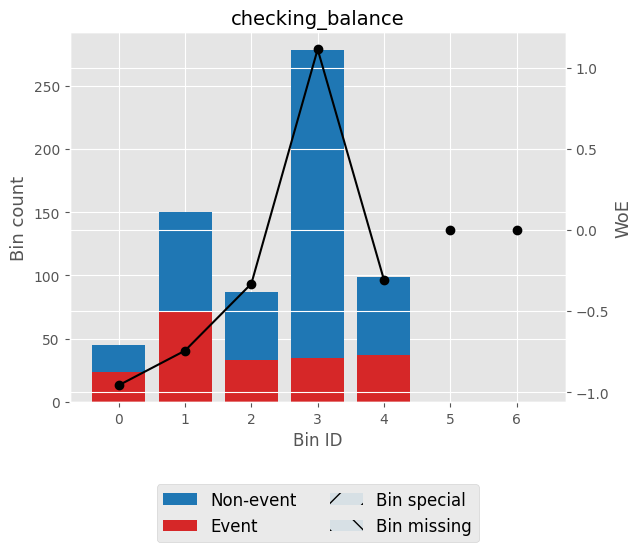

WoE for bin 0 = -0.9570956686796318
WoE for bin 1 = -0.7435215683815727
WoE for bin 2 = -0.33108779095731505
WoE for bin 3 = 1.1141491057960253
WoE for bin 4 = -0.307347803654242
months_loan_duration


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name             Bin  Count  Count (%)  Non-event  Event  \
0  months_loan_duration    (-inf, 7.50)     54   0.078148         48      6   
1  months_loan_duration   [7.50, 11.50)     62   0.089725         48     14   
2  months_loan_duration  [11.50, 17.00)    179   0.259045        134     45   
3  months_loan_duration  [17.00, 26.50)    239   0.345876        169     70   
4  months_loan_duration  [26.50, 33.00)     42   0.060781         29     13   
5  months_loan_duration  [33.00, 43.50)     73   0.105644         41     32   
6  months_loan_duration    [43.50, inf)     42   0.060781         15     27   

   Event rate       WoE        IV        JS  
0    0.111111  1.230075  0.086337  0.010159  
1    0.225806  0.382778  0.012073  0.001500  
2    0.251397  0.241811  0.014380  0.001793  
3    0.292887  0.032037  0.000353  0.000044  
4    0.309524  -0.04702  0.000136  0.000017  
5    0.438356  -0.60153  0.042034  0.005176  
6    0.642857 -1.437153  0.142915  0.016470

 Information Value for months_loan_duration = 0.29822702146940877




Since Information Value is Between 0.02 and 0.5, " months_loan_duration " Should be used going forward.
The Information Value of " months_loan_duration " is 0.29822702146940877 , Which is Medium Predictive Power.


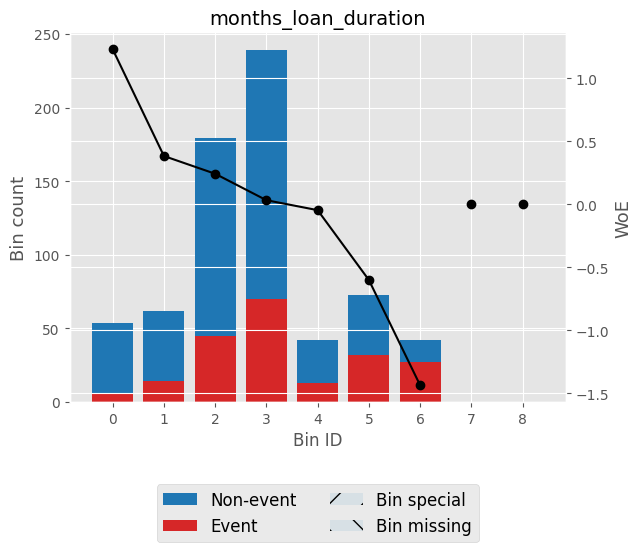

WoE for bin 0 = 1.2300754282285733
WoE for bin 1 = 0.38277756784136974
WoE for bin 2 = 0.24181119672932913
WoE for bin 3 = 0.03203735942245194
WoE for bin 4 = -0.04701964092632534
WoE for bin 5 = -0.6015299495466814
WoE for bin 6 = -1.4371527783533815
credit_history


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                                        Bin  Count  \
0  credit_history                               ['critical']    211   
1  credit_history                                ['delayed']     65   
2  credit_history                                 ['repaid']    357   
3  credit_history  ['fully repaid this bank' 'fully repaid']     67   

   Count (%)  Non-event  Event  Event rate       WoE        IV        JS  
0   0.301429        179     32    0.151659   0.86754  0.183443  0.022237  
1   0.092857         47     18    0.276923  0.105666  0.001014  0.000127  
2   0.510000        238    119    0.333333 -0.160963  0.013626  0.001701  
3   0.095714         27     40    0.597015 -1.247152  0.170109  0.019985

 Information Value for credit_history = 0.3681921281681744




Since Information Value is Between 0.02 and 0.5, " credit_history " Should be used going forward.
The Information Value of " credit_history " is 0.3681921281681744 , Which is Strong Predictive Power.


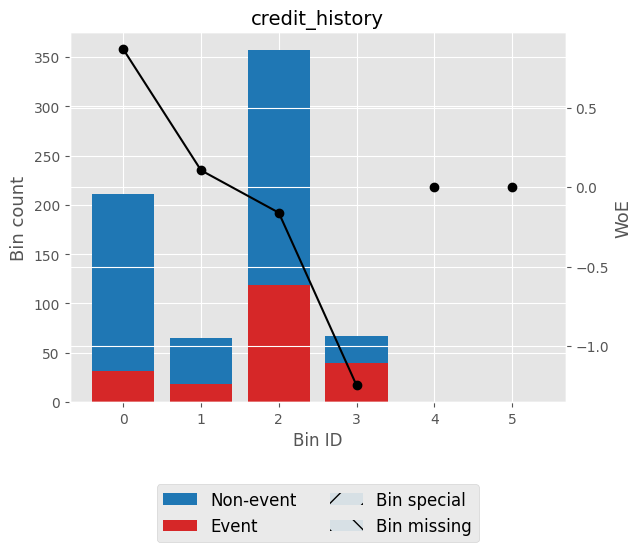

WoE for bin 0 = 0.867540027211319
WoE for bin 1 = 0.10566596798418429
WoE for bin 2 = -0.1609626952697643
WoE for bin 3 = -1.247152463939317
purpose


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                                  Bin  Count  Count (%)  \
0       purpose          ['retraining' 'car (used)']     80   0.114286   
1       purpose                         ['radio/tv']    202   0.288571   
2       purpose              ['furniture' 'repairs']    134   0.191429   
3       purpose                         ['business']     65   0.092857   
4       purpose  ['car (new)' 'domestic appliances']    179   0.255714   
5       purpose               ['education' 'others']     40   0.057143   

   Non-event  Event  Event rate       WoE        IV        JS  
0         66     14    0.175000  0.696488  0.046967  0.005755  
1        161     41    0.202970  0.513722  0.067673  0.008367  
2         96     38    0.283582  0.072652  0.000995  0.000124  
3         40     25    0.384615 -0.384106  0.014654  0.001821  
4        108     71    0.396648 -0.434659  0.052052  0.006456  
5         20     20    0.500000  -0.85411  0.046942  0.005696

 Information Value for purpose = 0.22928323866924277




Since Information Value is Between 0.02 and 0.5, " purpose " Should be used going forward.
The Information Value of " purpose " is 0.22928323866924277 , Which is Medium Predictive Power.


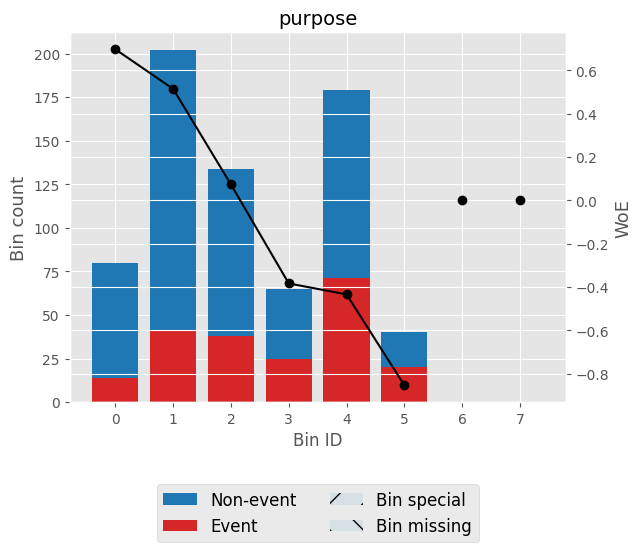

WoE for bin 0 = 0.6964875365814573
WoE for bin 1 = 0.5137224224504456
WoE for bin 2 = 0.07265215591174087
WoE for bin 3 = -0.38410624658397396
WoE for bin 4 = -0.43465852574680525
WoE for bin 5 = -0.8541098758297094


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

amount


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                 Bin  Count  Count (%)  Non-event  Event  \
0        amount     (-inf, 1387.00)    178   0.276398        120     58   
1        amount  [1387.00, 3554.00)    294   0.456522        227     67   
2        amount  [3554.00, 3913.50)     37   0.057453         34      3   
3        amount  [3913.50, 6322.50)     87   0.135093         56     31   
4        amount      [6322.50, inf)     48   0.074534         29     19   

   Event rate       WoE        IV        JS  
0    0.325843 -0.235353  0.016082  0.002006  
1    0.227891  0.257855  0.028550  0.003559  
2    0.081081  1.465346  0.082217  0.009446  
3    0.356322 -0.371038  0.020031  0.002490  
4    0.395833 -0.539545  0.024015  0.002966

 Information Value for amount = 0.17089446830783378




Since Information Value is Between 0.02 and 0.5, " amount " Should be used going forward.
The Information Value of " amount " is 0.17089446830783378 , Which is Medium Predictive Power.


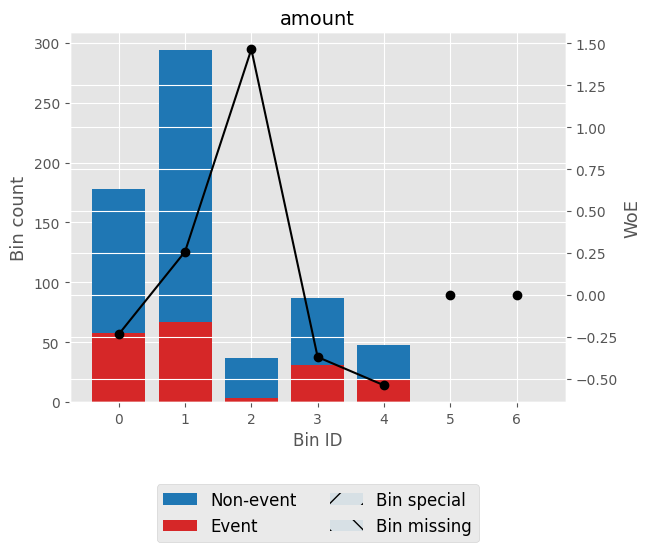

WoE for bin 0 = -0.2353533515979342
WoE for bin 1 = 0.257855314256876
WoE for bin 2 = 1.465346152114491
WoE for bin 3 = -0.3710375975835578
WoE for bin 4 = -0.5395452330135271


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

savings_balance


Variable Name              Bin  Count  Count (%)  Non-event  Event  \
0  savings_balance    (-inf, 55.50)    234   0.488518        144     90   
1  savings_balance   [55.50, 90.50)    155   0.323591        104     51   
2  savings_balance  [90.50, 207.00)     49   0.102296         42      7   
3  savings_balance    [207.00, inf)     41   0.085595         23     18   

   Event rate       WoE        IV        JS  
0    0.384615 -0.164212  0.013483  0.001683  
1    0.329032   0.07835  0.001962  0.000245  
2    0.142857  1.157544  0.106513  0.012617  
3    0.439024 -0.389093  0.013599  0.001689

 Information Value for savings_balance = 0.13555701851183072




Since Information Value is Between 0.02 and 0.5, " savings_balance " Should be used going forward.
The Information Value of " savings_balance " is 0.13555701851183072 , Which is Medium Predictive Power.


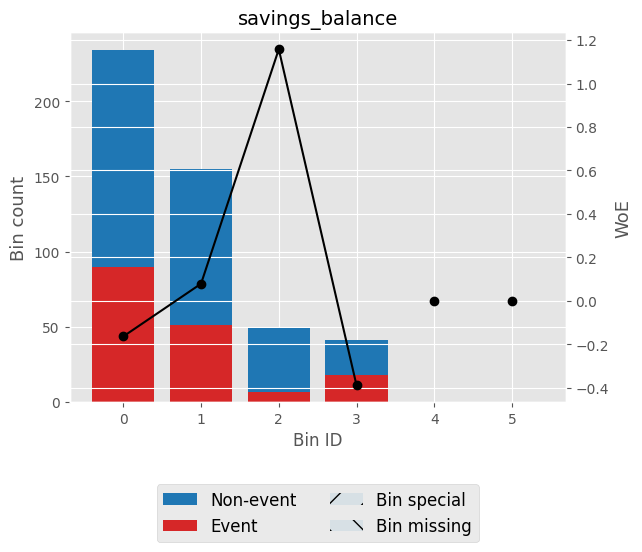

WoE for bin 0 = -0.16421177293787437
WoE for bin 1 = 0.07834986423343684
WoE for bin 2 = 1.157544067044445
WoE for bin 3 = -0.38909294415062495
installment_rate


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  Count (%)  Non-event  Event  \
0  installment_rate  (-inf, 1.50)     94   0.134286         69     25   
1  installment_rate  [1.50, 2.50)    162   0.231429        117     45   
2  installment_rate  [2.50, 3.50)    107   0.152857         76     31   
3  installment_rate   [3.50, inf)    337   0.481429        229    108   

   Event rate       WoE        IV        JS  
0    0.265957  0.161121  0.003369  0.000421  
1    0.277778  0.101402  0.002330  0.000291  
2    0.289720  0.042636  0.000275  0.000034  
3    0.320475 -0.102519  0.005162  0.000645

 Information Value for installment_rate = 0.01113686717172772




Since Information Value is Less than 0.02, " installment_rate " is not Useful for Prediction, thus should be NOT used going forward.


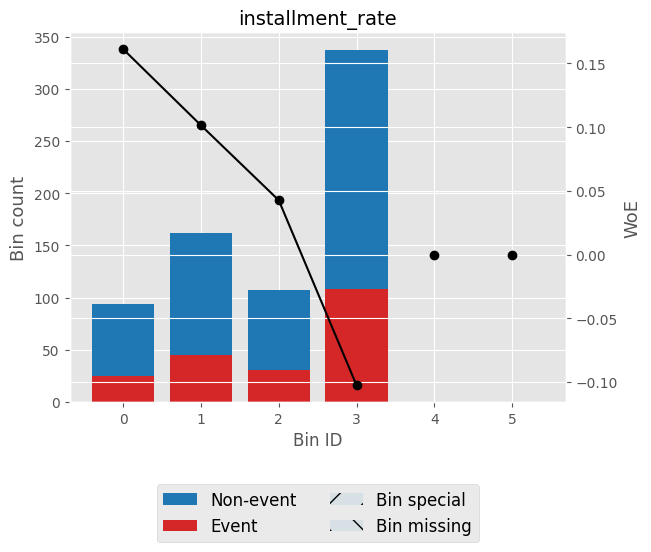

WoE for bin 0 = 0.1611208038993491
WoE for bin 1 = 0.10140156919772671
WoE for bin 2 = 0.0426362599714751
WoE for bin 3 = -0.10251909939968966
personal_status


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                     Bin  Count  Count (%)  Non-event  \
0  personal_status              ['single']    385   0.550000        284   
1  personal_status             ['married']     64   0.091429         46   
2  personal_status  ['divorced' 'Unknown']    251   0.358571        161   

   Event  Event rate       WoE        IV        JS  
0    101    0.262338  0.179744  0.017104  0.002135  
1     18    0.281250   0.08416  0.000636  0.000080  
2     90    0.358566 -0.272515  0.027993  0.003488

 Information Value for personal_status = 0.04573314056741434




Since Information Value is Between 0.02 and 0.5, " personal_status " Should be used going forward.
The Information Value of " personal_status " is 0.04573314056741434 , Which is Week Predictive Power.


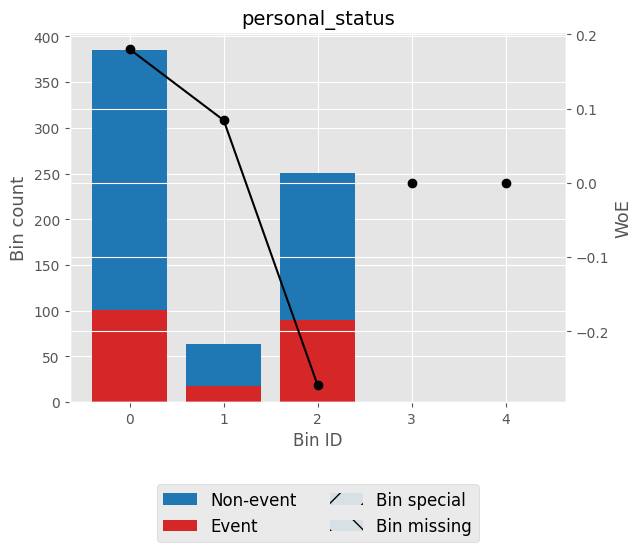

WoE for bin 0 = 0.17974384549023692
WoE for bin 1 = 0.0841597627632207
WoE for bin 2 = -0.27251518117551177
other_debtors


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                      Bin  Count  Count (%)  Non-event  Event  \
0  other_debtors            ['guarantor']     40   0.057143         31      9   
1  other_debtors  ['none' 'co-applicant']    660   0.942857        460    200   

   Event rate       WoE        IV        JS  
0     0.22500  0.382653  0.007681  0.000954  
1     0.30303 -0.021201  0.000426  0.000053

 Information Value for other_debtors = 0.008107058329163948




Since Information Value is Less than 0.02, " other_debtors " is not Useful for Prediction, thus should be NOT used going forward.


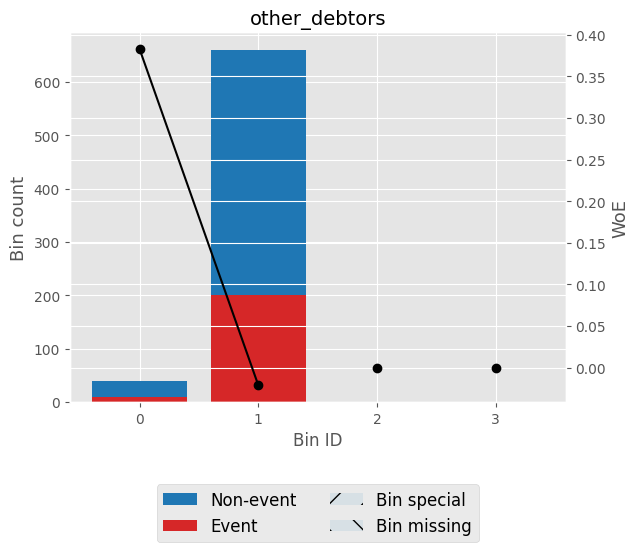

WoE for bin 0 = 0.3826527513192173
WoE for bin 1 = -0.021200752894605625
property


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                           Bin  Count  Count (%)  Non-event  \
0      property               ['real estate']    197   0.281429        158   
1      property                     ['other']    234   0.334286        162   
2      property  ['building society savings']    162   0.231429        112   
3      property              ['unknown/none']    107   0.152857         59   

   Event  Event rate       WoE        IV        JS  
0     39    0.197970  0.544924  0.073668  0.009096  
1     72    0.307692  -0.04318  0.000629  0.000079  
2     50    0.308642 -0.047634  0.000530  0.000066  
3     48    0.448598 -0.647773  0.070933  0.008715

 Information Value for property = 0.1457591917382032




Since Information Value is Between 0.02 and 0.5, " property " Should be used going forward.
The Information Value of " property " is 0.1457591917382032 , Which is Medium Predictive Power.


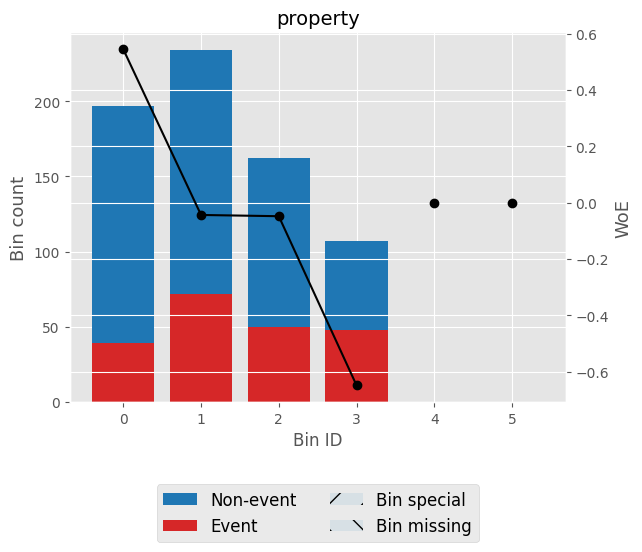

WoE for bin 0 = 0.5449235110676108
WoE for bin 1 = -0.04317965961338084
WoE for bin 2 = -0.047634009962761
WoE for bin 3 = -0.6477734428318811


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

age


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name             Bin  Count  Count (%)  Non-event  Event  \
0           age   (-inf, 25.50)    128   0.184173         71     57   
1           age  [25.50, 29.50)    136   0.195683         90     46   
2           age  [29.50, 34.50)    122   0.175540         86     36   
3           age  [34.50, 36.50)     50   0.071942         43      7   
4           age  [36.50, 49.50)    184   0.264748        140     44   
5           age    [49.50, inf)     75   0.107914         57     18   

   Event rate       WoE        IV        JS  
0    0.445312 -0.631097  0.080937  0.009952  
1    0.338235 -0.179558  0.006527  0.000815  
2    0.295082  0.020102  0.000071  0.000009  
3    0.140000  0.964564  0.052706  0.006344  
4    0.239130  0.306727  0.023292  0.002900  
5    0.240000  0.301953  0.009211  0.001147

 Information Value for age = 0.17274240395031815




Since Information Value is Between 0.02 and 0.5, " age " Should be used going forward.
The Information Value of " age " is 0.17274240395031815 , Which is Medium Predictive Power.


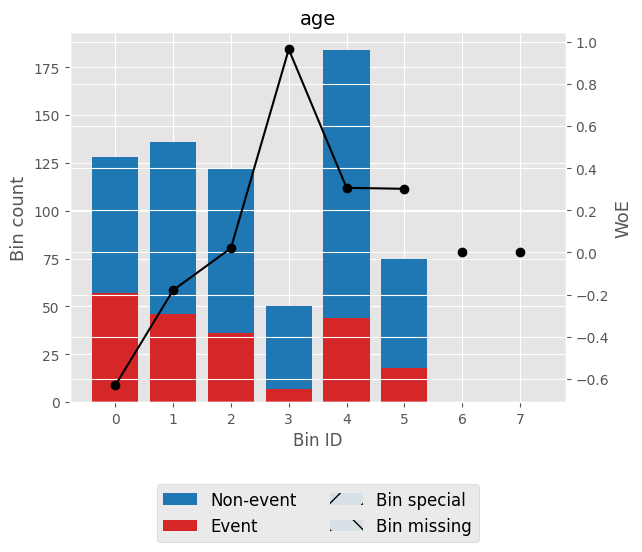

WoE for bin 0 = -0.6310974341745067
WoE for bin 1 = -0.17955776954010175
WoE for bin 2 = 0.020102314416126033
WoE for bin 3 = 0.9645639232569774
WoE for bin 4 = 0.30672674530977134
WoE for bin 5 = 0.30195346655711375
installment_plan


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                Bin  Count  Count (%)  Non-event  Event  \
0  installment_plan           ['none']    575   0.821429        414    161   
1  installment_plan  ['stores' 'bank']    125   0.178571         77     48   

   Event rate       WoE        IV        JS  
0       0.280  0.090352  0.006581  0.000822  
1       0.384 -0.381505  0.027790  0.003453

 Information Value for installment_plan = 0.034371145248594914




Since Information Value is Between 0.02 and 0.5, " installment_plan " Should be used going forward.
The Information Value of " installment_plan " is 0.034371145248594914 , Which is Week Predictive Power.


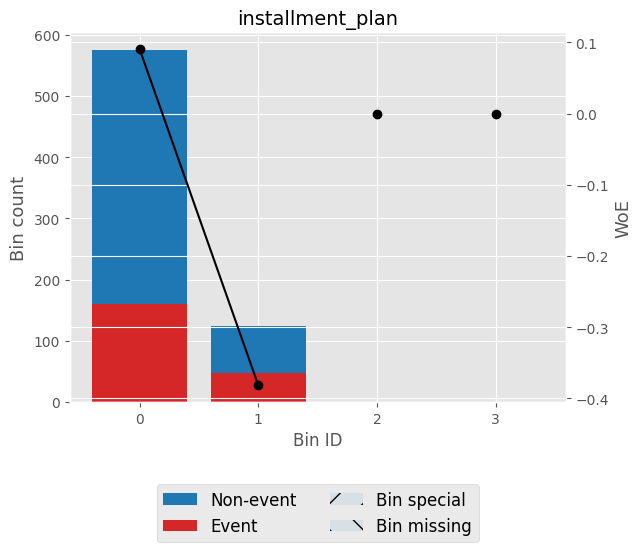

WoE for bin 0 = 0.09035173301114166
WoE for bin 1 = -0.3815054648839167
housing


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       housing       ['own']    502   0.717143        374    128    0.254980   
1       housing      ['rent']    122   0.174286         75     47    0.385246   
2       housing  ['for free']     76   0.108571         42     34    0.447368   

        WoE        IV        JS  
0  0.218116  0.032558  0.004062  
1 -0.386769  0.027898  0.003466  
2 -0.642801  0.049585  0.006094

 Information Value for housing = 0.11004174147153623




Since Information Value is Between 0.02 and 0.5, " housing " Should be used going forward.
The Information Value of " housing " is 0.11004174147153623 , Which is Medium Predictive Power.


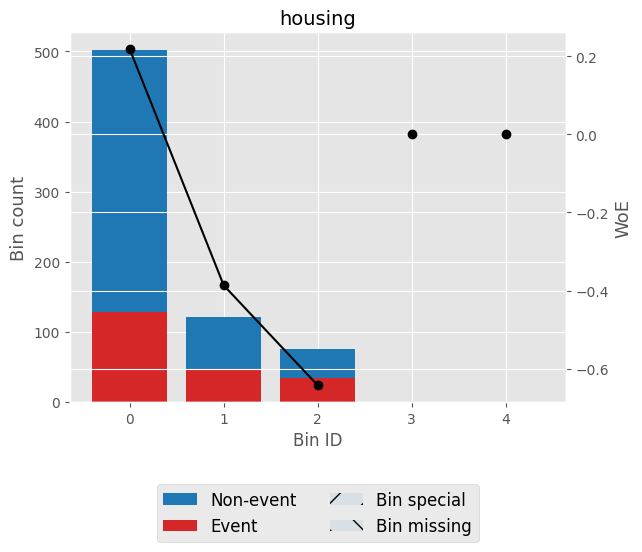

WoE for bin 0 = 0.21811565766520524
WoE for bin 1 = -0.3867693640034576
WoE for bin 2 = -0.6428007821625026
existing_credits


/usr/local/lib/python3.10/dist-packages/optbinning/binning/outlier.py:158: RuntimeWarning: divide by zero encountered in divide
  m_z_score = 0.6745 * (x - median) / mad
/usr/local/lib/python3.10/dist-packages/optbinning/binning/outlier.py:158: RuntimeWarning: invalid value encountered in divide
  m_z_score = 0.6745 * (x - median) / mad
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: Fu

Variable Name          Bin  Count  Count (%)  Non-event  Event  \
0  existing_credits  (-inf, inf)    435        1.0        296    139   

   Event rate  WoE   IV   JS  
0     0.31954 -0.0  0.0  0.0

 Information Value for existing_credits = 0.0




Since Information Value is Less than 0.02, " existing_credits " is not Useful for Prediction, thus should be NOT used going forward.


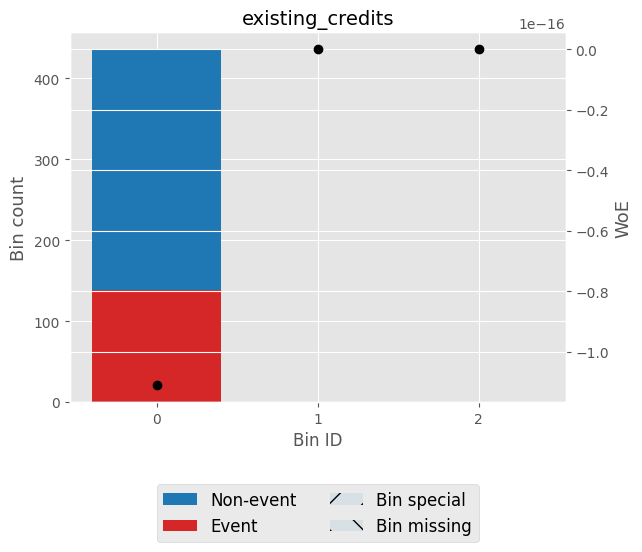

WoE for bin 0 = 0.0
dependents


/usr/local/lib/python3.10/dist-packages/optbinning/binning/outlier.py:158: RuntimeWarning: divide by zero encountered in divide
  m_z_score = 0.6745 * (x - median) / mad
/usr/local/lib/python3.10/dist-packages/optbinning/binning/outlier.py:158: RuntimeWarning: invalid value encountered in divide
  m_z_score = 0.6745 * (x - median) / mad
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: Fu

Variable Name          Bin  Count  Count (%)  Non-event  Event  Event rate  \
0    dependents  (-inf, inf)    604        1.0        424    180    0.298013   

   WoE   IV   JS  
0 -0.0  0.0  0.0

 Information Value for dependents = 0.0




Since Information Value is Less than 0.02, " dependents " is not Useful for Prediction, thus should be NOT used going forward.


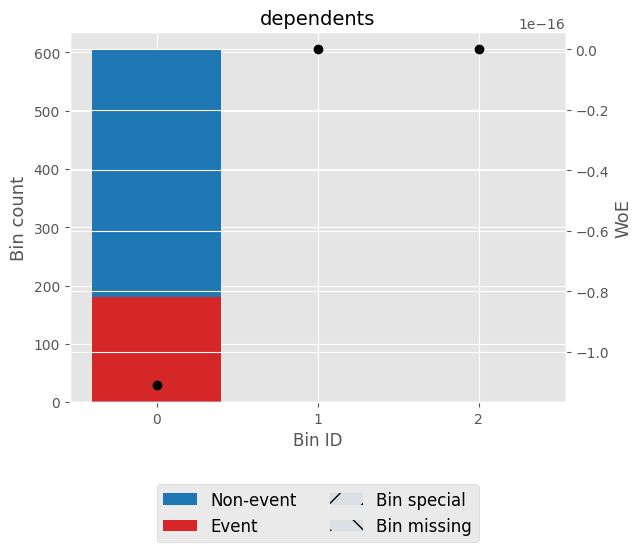

WoE for bin 0 = 0.0
foreign_worker


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  Count (%)  Non-event  Event  \
0  foreign_worker  ['no' 'yes']    700        1.0        491    209   

   Event rate  WoE   IV   JS  
0    0.298571 -0.0  0.0  0.0

 Information Value for foreign_worker = 0.0




Since Information Value is Less than 0.02, " foreign_worker " is not Useful for Prediction, thus should be NOT used going forward.


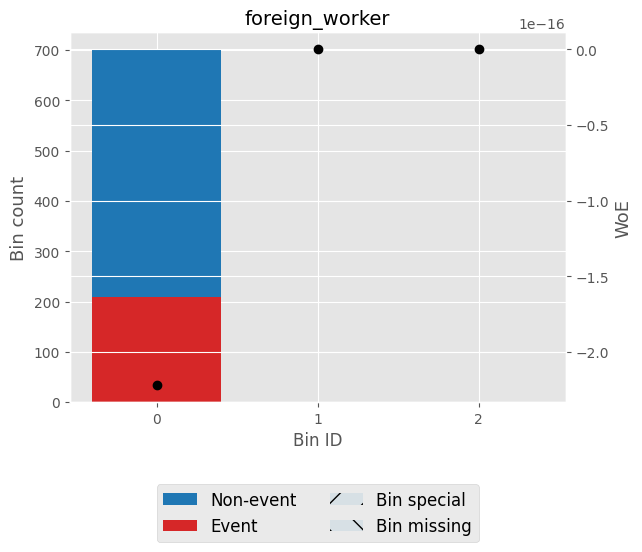

WoE for bin 0 = 0.0
job


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                                                Bin  Count  \
0           job                             ['unskilled resident']    129   
1           job                               ['skilled employee']    441   
2           job  ['unemployed non-resident' 'mangement self-emp...    130   

   Count (%)  Non-event  Event  Event rate       WoE        IV        JS  
0   0.184286         94     35    0.271318  0.133837  0.003210  0.000401  
1   0.630000        311    130    0.294785  0.018149  0.000207  0.000026  
2   0.185714         86     44    0.338462 -0.183952  0.006507  0.000812

 Information Value for job = 0.009923451868747844




Since Information Value is Less than 0.02, " job " is not Useful for Prediction, thus should be NOT used going forward.


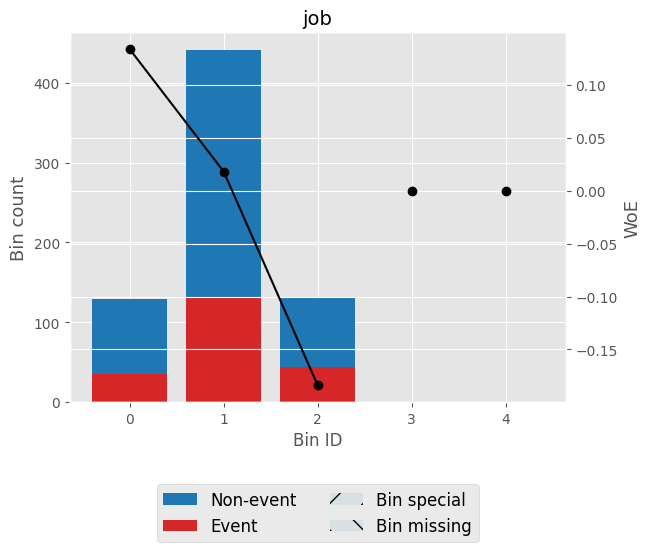

WoE for bin 0 = 0.13383684495088038
WoE for bin 1 = 0.018148585893942085
WoE for bin 2 = -0.18395221349446295
gender


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name         Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        gender    ['male']    478   0.682857        349    129    0.269874   
1        gender  ['female']    222   0.317143        142     80    0.360360   

        WoE        IV        JS  
0   0.14115  0.013207  0.001650  
1 -0.280309  0.026228  0.003268

 Information Value for gender = 0.039435681787566006




Since Information Value is Between 0.02 and 0.5, " gender " Should be used going forward.
The Information Value of " gender " is 0.039435681787566006 , Which is Week Predictive Power.


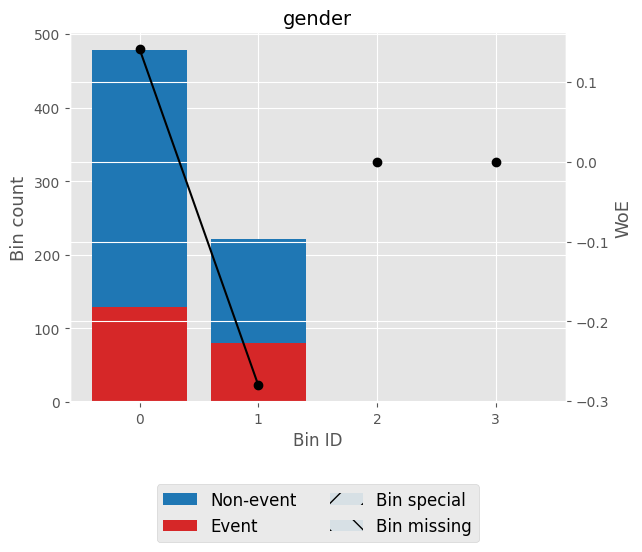

WoE for bin 0 = 0.14114964201104535
WoE for bin 1 = -0.28030945290233056
employment_length_years


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  Count (%)  Non-event  Event  \
0  employment_length_years  (-inf, 0.29)     37   0.058917         20     17   
1  employment_length_years  [0.29, 3.50)    362   0.576433        245    117   
2  employment_length_years  [3.50, 5.50)     62   0.098726         44     18   
3  employment_length_years  [5.50, 7.50)     75   0.119427         56     19   
4  employment_length_years   [7.50, inf)     92   0.146497         73     19   

   Event rate       WoE        IV        JS  
0    0.459459 -0.672676  0.029471  0.003616  
1    0.323204 -0.096111  0.005423  0.000678  
2    0.290323  0.058623  0.000335  0.000042  
3    0.253333  0.245718  0.006844  0.000853  
4    0.206522  0.510826  0.034055  0.004211

 Information Value for employment_length_years = 0.07612894402333552




Since Information Value is Between 0.02 and 0.5, " employment_length_years " Should be used going forward.
The Information Value of " employment_length_years " is 0.07612894402333552 , Which is Week Predictive Power.


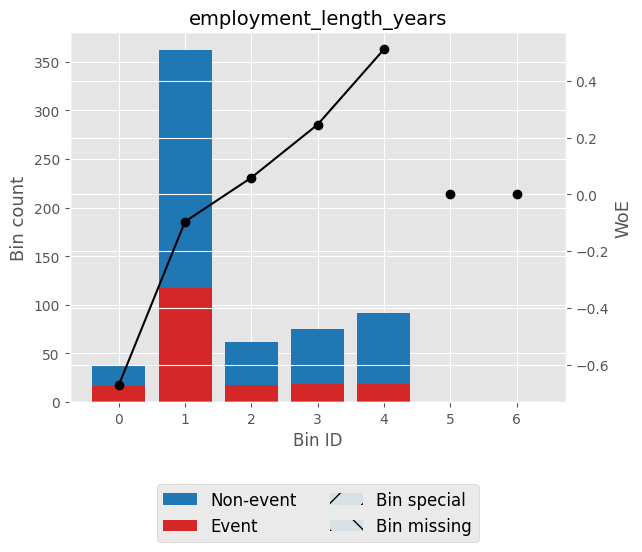

WoE for bin 0 = -0.6726759087181851
WoE for bin 1 = -0.09611056246898912
WoE for bin 2 = 0.05862303780613633
WoE for bin 3 = 0.24571787335274872
WoE for bin 4 = 0.5108256237659906
residence_history_years


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name             Bin  Count  Count (%)  Non-event  \
0  residence_history_years    (-inf, 0.29)     78   0.115899         47   
1  residence_history_years    [0.29, 0.54)     48   0.071322         33   
2  residence_history_years   [0.54, 13.50)    421   0.625557        299   
3  residence_history_years  [13.50, 18.50)     71   0.105498         57   
4  residence_history_years    [18.50, inf)     55   0.081724         39   

   Event  Event rate       WoE        IV        JS  
0     31    0.397436 -0.458887  0.026440  0.003276  
1     15    0.312500  -0.08659  0.000544  0.000068  
2    122    0.289786  0.021375  0.000285  0.000036  
3     14    0.197183  0.528946  0.026073  0.003222  
4     16    0.290909  0.015925  0.000021  0.000003

 Information Value for residence_history_years = 0.05336293575376096




Since Information Value is Between 0.02 and 0.5, " residence_history_years " Should be used going forward.
The Information Value of " residence_history_years " is 0.05336293575376096 , Which is Week Predictive Power.


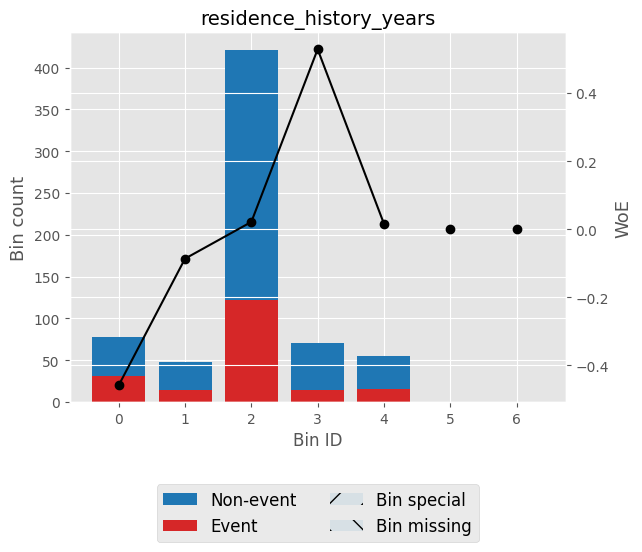

WoE for bin 0 = -0.45888737611519376
WoE for bin 1 = -0.08659041297583583
WoE for bin 2 = 0.02137475531732382
WoE for bin 3 = 0.5289461648791856
WoE for bin 4 = 0.015925150549759168


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

installment_rate_amount


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                  Bin  Count  Count (%)  Non-event  \
0  installment_rate_amount      (-inf, 5144.00)    253   0.388633        185   
1  installment_rate_amount   [5144.00, 5551.00)     41   0.062980         31   
2  installment_rate_amount   [5551.00, 6166.00)     41   0.062980         38   
3  installment_rate_amount   [6166.00, 8570.00)    108   0.165899         82   
4  installment_rate_amount   [8570.00, 9605.00)     36   0.055300         23   
5  installment_rate_amount  [9605.00, 16170.00)    135   0.207373         86   
6  installment_rate_amount      [16170.00, inf)     37   0.056836         22   

   Event  Event rate       WoE        IV        JS  
0     68    0.268775  0.069455  0.001846  0.000231  
1     10    0.243902  0.200009  0.002407  0.000300  
2      3    0.073171   1.60758  0.104599  0.011827  
3     26    0.240741  0.217229  0.007448  0.000929  
4     13    0.361111 -0.360849  0.007723  0.000960  
5     49    0.362963 -0.368867  0.030302  0.003766  
6     15    0.405405 -0.548401  0.018872  0.002330

 Information Value for installment_rate_amount = 0.1731965615296603




Since Information Value is Between 0.02 and 0.5, " installment_rate_amount " Should be used going forward.
The Information Value of " installment_rate_amount " is 0.1731965615296603 , Which is Medium Predictive Power.


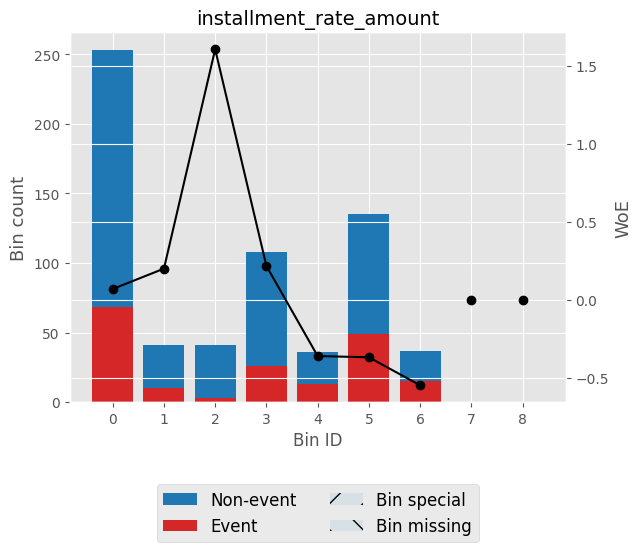

WoE for bin 0 = 0.06945461984230648
WoE for bin 1 = 0.20000861143118898
WoE for bin 2 = 1.6075803709983645
WoE for bin 3 = 0.21722920918285948
WoE for bin 4 = -0.3608486415922987
WoE for bin 5 = -0.3688665019170307
WoE for bin 6 = -0.548401247803806


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

saving_to_amount_ration


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  Count (%)  Non-event  Event  \
0  saving_to_amount_ration  (-inf, 0.00)     39   0.071691         18     21   
1  saving_to_amount_ration  [0.00, 0.01)    109   0.200368         64     45   
2  saving_to_amount_ration  [0.01, 0.05)    240   0.441176        163     77   
3  saving_to_amount_ration  [0.05, 0.12)     91   0.167279         66     25   
4  saving_to_amount_ration   [0.12, inf)     65   0.119485         55     10   

   Event rate       WoE        IV        JS  
0    0.538462    -0.875  0.060198  0.007293  
1    0.412844 -0.368629  0.028733  0.003571  
2    0.320833  0.029095  0.000372  0.000046  
3    0.274725  0.249929  0.009967  0.001243  
4    0.153846  0.983898  0.092578  0.011127

 Information Value for saving_to_amount_ration = 0.1918473423746948




Since Information Value is Between 0.02 and 0.5, " saving_to_amount_ration " Should be used going forward.
The Information Value of " saving_to_amount_ration " is 0.1918473423746948 , Which is Medium Predictive Power.


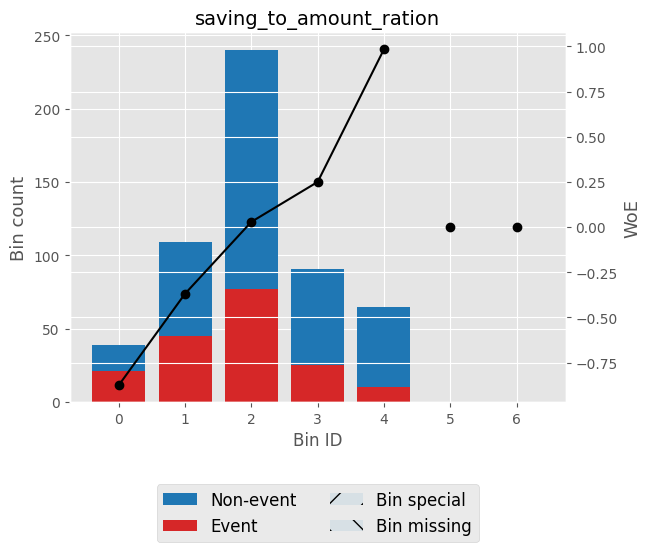

WoE for bin 0 = -0.8750004629365393
WoE for bin 1 = -0.368629189519929
WoE for bin 2 = 0.029094995843797357
WoE for bin 3 = 0.24992913404894357
WoE for bin 4 = 0.9838983091291442
loan_duration_to_employment_length


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name            Bin  Count  Count (%)  \
0  loan_duration_to_employment_length   (-inf, 1.27)     89   0.133034   
1  loan_duration_to_employment_length   [1.27, 2.43)    120   0.179372   
2  loan_duration_to_employment_length   [2.43, 3.40)     73   0.109118   
3  loan_duration_to_employment_length   [3.40, 4.35)     67   0.100149   
4  loan_duration_to_employment_length  [4.35, 12.26)    264   0.394619   
5  loan_duration_to_employment_length   [12.26, inf)     56   0.083707   

   Non-event  Event  Event rate       WoE        IV        JS  
0         74     15    0.168539  0.693287  0.053898  0.006605  
1         95     25    0.208333  0.432273  0.030279  0.003756  
2         55     18    0.246575  0.214234  0.004774  0.000596  
3         49     18    0.268657  0.098721  0.000955  0.000119  
4        177     87    0.329545 -0.192486  0.015193  0.001896  
5         26     30    0.535714 -1.045829  0.105439  0.012610

 Information Value for loan_duration_to_employment_length = 0.21053703236267635




Since Information Value is Between 0.02 and 0.5, " loan_duration_to_employment_length " Should be used going forward.
The Information Value of " loan_duration_to_employment_length " is 0.21053703236267635 , Which is Medium Predictive Power.


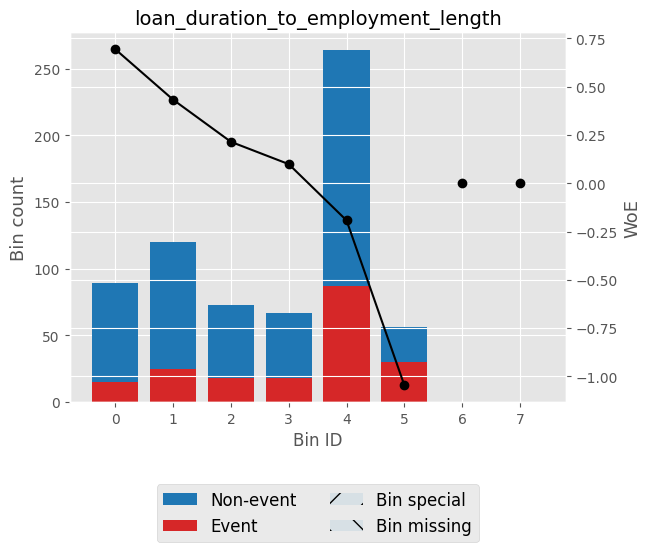

WoE for bin 0 = 0.6932872267754252
WoE for bin 1 = 0.43227340140580583
WoE for bin 2 = 0.21423376200977182
WoE for bin 3 = 0.09872087488792754
WoE for bin 4 = -0.19248605140728897
WoE for bin 5 = -1.0458285089672077


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

existing_credits_to_age


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  Count (%)  Non-event  Event  \
0  existing_credits_to_age  (-inf, 0.02)     36   0.051948         30      6   
1  existing_credits_to_age  [0.02, 0.03)    146   0.210678        106     40   
2  existing_credits_to_age  [0.03, 0.07)    427   0.616162        301    126   
3  existing_credits_to_age  [0.07, 0.07)     42   0.060606         28     14   
4  existing_credits_to_age   [0.07, inf)     42   0.060606         23     19   

   Event rate       WoE        IV            JS  
0    0.166667  0.742132  0.023902  2.921014e-03  
1    0.273973  0.107254  0.002369  2.960294e-04  
2    0.295082  0.003523  0.000008  9.552125e-07  
3    0.333333 -0.174158  0.001901  2.373311e-04  
4    0.452381  -0.67625  0.030804  3.778816e-03

 Information Value for existing_credits_to_age = 0.058984407005212416




Since Information Value is Between 0.02 and 0.5, " existing_credits_to_age " Should be used going forward.
The Information Value of " existing_credits_to_age " is 0.058984407005212416 , Which is Week Predictive Power.


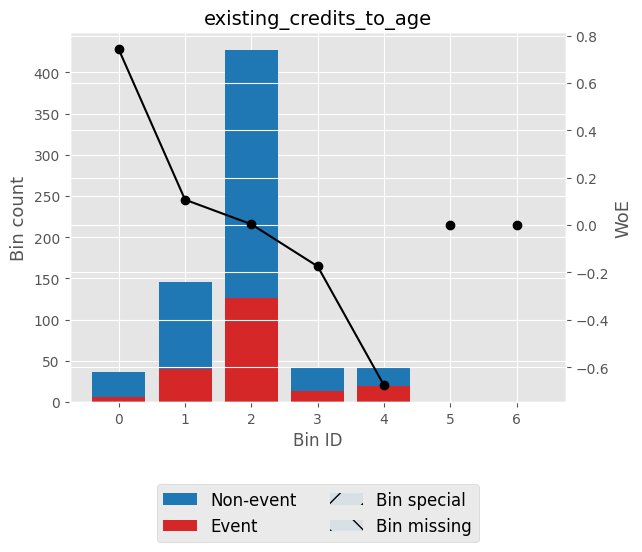

WoE for bin 0 = 0.7421324857193613
WoE for bin 1 = 0.10725421328339173
WoE for bin 2 = 0.0035229310826586768
WoE for bin 3 = -0.1741582461547937
WoE for bin 4 = -0.6762501899520299


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

amount_to_years_at_residence


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name                Bin  Count  Count (%)  \
0  amount_to_years_at_residence      (-inf, 70.84)     43   0.070261   
1  amount_to_years_at_residence    [70.84, 175.95)    120   0.196078   
2  amount_to_years_at_residence   [175.95, 422.50)    150   0.245098   
3  amount_to_years_at_residence   [422.50, 503.04)     35   0.057190   
4  amount_to_years_at_residence   [503.04, 647.08)     43   0.070261   
5  amount_to_years_at_residence  [647.08, 1900.60)    185   0.302288   
6  amount_to_years_at_residence     [1900.60, inf)     36   0.058824   

   Non-event  Event  Event rate       WoE        IV        JS  
0         36      7    0.162791  0.682097  0.027469  0.003369  
1         88     32    0.266667  0.056089  0.000609  0.000076  
2        104     46    0.306667 -0.139762  0.004933  0.000616  
3         20     15    0.428571 -0.667829  0.028708  0.003523  
4         29     14    0.325581 -0.227273  0.003805  0.000475  
5        137     48    0.259459  0.093268  0.002574  0.000322  
6         28      8    0.222222  0.297252  0.004842  0.000603

 Information Value for amount_to_years_at_residence = 0.07294007385040278




Since Information Value is Between 0.02 and 0.5, " amount_to_years_at_residence " Should be used going forward.
The Information Value of " amount_to_years_at_residence " is 0.07294007385040278 , Which is Week Predictive Power.


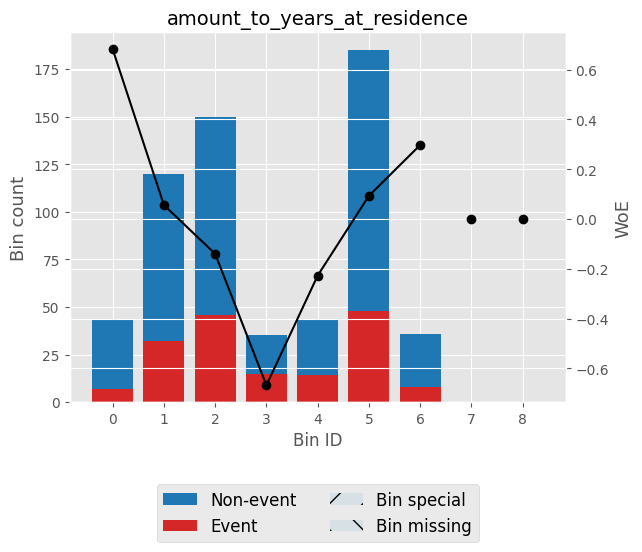

WoE for bin 0 = 0.6820973443733603
WoE for bin 1 = 0.05608946665104358
WoE for bin 2 = -0.1397619423751586
WoE for bin 3 = -0.6678293725756556
WoE for bin 4 = -0.2272729446562209
WoE for bin 5 = 0.09326846989279772
WoE for bin 6 = 0.29725152346793154


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

loan_duration_to_years_at_residence


Variable Name           Bin  Count  Count (%)  \
0  loan_duration_to_years_at_residence  (-inf, 1.17)    122   0.192126   
1  loan_duration_to_years_at_residence  [1.17, 1.43)     38   0.059843   
2  loan_duration_to_years_at_residence  [1.43, 2.07)     73   0.114961   
3  loan_duration_to_years_at_residence   [2.07, inf)    402   0.633071   

   Non-event  Event  Event rate       WoE        IV        JS  
0         92     30    0.245902  0.146248  0.003971  0.000496  
1         35      3    0.078947  1.482393  0.086988  0.009976  
2         52     21    0.287671 -0.067621  0.000534  0.000067  
3        282    120    0.298507 -0.119927  0.009347  0.001168

 Information Value for loan_duration_to_years_at_residence = 0.10083955050000826




Since Information Value is Between 0.02 and 0.5, " loan_duration_to_years_at_residence " Should be used going forward.
The Information Value of " loan_duration_to_years_at_residence " is 0.10083955050000826 , Which is Medium Predictive Power.


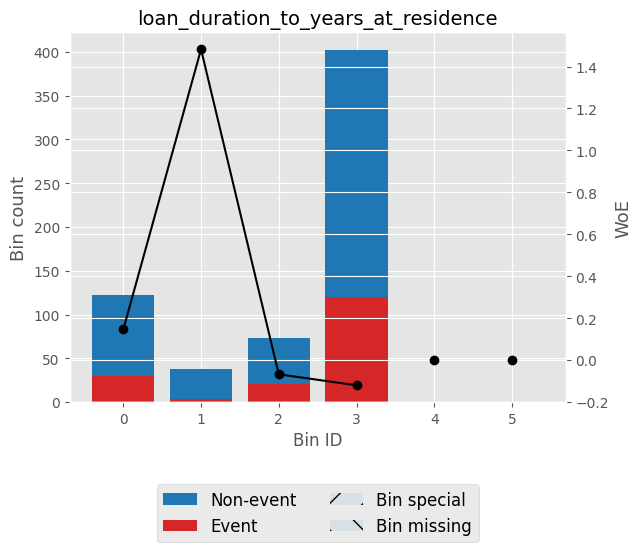

WoE for bin 0 = 0.1462484516047654
WoE for bin 1 = 1.4823930290391845
WoE for bin 2 = -0.06762146292411528
WoE for bin 3 = -0.11992741562605198
years_at_residence_per_month_of_loan_duration


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Variable Name           Bin  Count  \
0  years_at_residence_per_month_of_loan_duration  (-inf, 0.13)     92   
1  years_at_residence_per_month_of_loan_duration  [0.13, 0.41)    131   
2  years_at_residence_per_month_of_loan_duration  [0.41, 0.97)     61   
3  years_at_residence_per_month_of_loan_duration  [0.97, 4.97)    273   
4  years_at_residence_per_month_of_loan_duration   [4.97, inf)    101   

   Count (%)  Non-event  Event  Event rate       WoE        IV        JS  
0   0.139818         50     42    0.456522 -0.632738  0.061380  0.007547  
1   0.199088         97     34    0.259542  0.241259  0.011025  0.001375  
2   0.092705         52      9    0.147541  0.946928  0.066238  0.007984  
3   0.414894        188     85    0.311355 -0.013301  0.000074  0.000009  
4   0.153495         68     33    0.326733 -0.084091  0.001103  0.000138

 Information Value for years_at_residence_per_month_of_loan_duration = 0.13981939439889712




Since Information Value is Between 0.02 and 0.5, " years_at_residence_per_month_of_loan_duration " Should be used going forward.
The Information Value of " years_at_residence_per_month_of_loan_duration " is 0.13981939439889712 , Which is Medium Predictive Power.


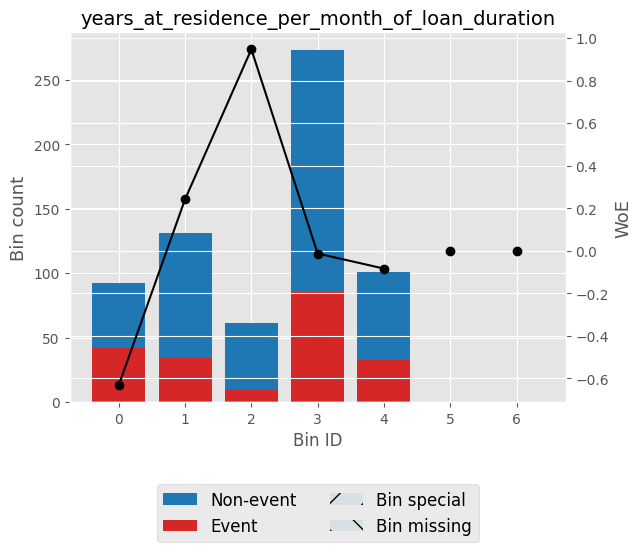

WoE for bin 0 = -0.6327380527643853
WoE for bin 1 = 0.24125901397805846
WoE for bin 2 = 0.9469277013360448
WoE for bin 3 = -0.013300733569530375
WoE for bin 4 = -0.08409129619953658


In [ ]:
# Initialize a List for Selected Variables
select_variables = []


# Loop Through Each Variable
for variable in variabel_name:
  # Extract Feature and Target Data
  x_in = x_train[variable].values # is the feature data for the current variable
  y_in = y_train # is the target variable data

  # Determine Variable Type to classify it as either numerical or categorical
  dtype = 'numerical' if x_train[variable].dtype != 'object' else 'categorical'

  # Initialize Optimal Binning to outlier detection and prebinning methods
  optb = OptimalBinning(name=variable,
                        dtype=dtype,
                        solver='cp',
                        outlier_detector='zscore',
                        prebinning_method='cart',
                        # verbose=True,
                        # max_pvalue=0.05)
                        )

  # Fit the Binning Model
  optb.fit(x_in, y_in)
  # print(optb.status)
  # print(optb.splits)

  # Build Binning Table
  binning_table = optb.binning_table
  table = binning_table.build()
  # print(table)

  # Clean the Binning Table
  table['Bin'] = table['Bin'].astype(str).fillna('')
  table_to_add = table[~table.Bin.str.contains('Special')]
  table_to_add = table_to_add[~table_to_add.Bin.str.contains('Missing')]
  table_to_add = table_to_add.iloc[:-1, :]

  # Display Variable Name and Binning Table
  print(color.BOLD + variable + color.END)
  table_to_add.insert(0, 'Variable Name', variable)
  table_complete = table_to_add
  display(table_complete)

  # Calculate Information Value (IV)
  xx = sum(table_complete['IV'])
  # print(f'Information Value for {variable} = {xx}')
  print(f'\033[1m Information Value for {variable} = {xx}\033[0m')
  print('\n')
  print('\n')


  # Evaluate Predictive Power Based on IV
  if xx > 0.02 and xx < 0.5:
    select_variables.append(variable)
    print('Since Information Value is Between 0.02 and 0.5, "', variable, '" Should be used going forward.')
    # Print Predictive Power Assessment
    if xx < 0.1:
      print('The Information Value of "', variable, '" is', xx, ', Which is Week Predictive Power.')
    elif xx < 0.3:
      print('The Information Value of "', variable, '" is', xx, ', Which is Medium Predictive Power.')
    else:
      print('The Information Value of "', variable, '" is', xx, ', Which is Strong Predictive Power.')
  elif xx < 0.02:
    print('Since Information Value is Less than 0.02, "', variable, '" is not Useful for Prediction, thus should be NOT used going forward.')
  else:
    print('Since Information Value is Less than 0.02 "', variable, '" Has has suspicious predictive power, thus should be NOT used going forward.')

  # Plot Binning Table
  binning_table.plot(metric = 'woe')

  # Calculate and Print Weight of Evidence (WoE)
  for i in range(0, len(table_complete)):
    gd = table_complete.iloc[i]['Non-event'] / table_complete['Non-event'].sum()
    bd = table_complete.iloc[i]['Event'] / table_complete['Event'].sum()
    WoE = np.log(gd / bd)
    print('WoE for bin', i, '=', WoE)

## Key Insights and Outcomes

* **Information Value (IV) Assessment.** Setiap variable dievaluasi berdasarkan IV, yang menghitung kemampuan prediktifnya. Metode ini mengkategorisasikan variable menjedi prediktor lemah, sedang, kuat, yang berguna dalam Feature Selection.

* **Binning and Data Preparation.** Dengan mengecualikan kotak 'Special' dan 'Missing', analisis difokuskan pada data yang relevan dan bersih, sehingga meningkatkan kualitas insights yang diperoleh.


* **Weight of Evidence (WoE) Calculation.** perhitungan WoE ini untuk menghitung setiap bin memberikan wawasan mengenai risiko relatif setiap kategori yang memungkinkan pemahaman yang lebih mendalam terhadap perilaku data mengenai variable target.

* **Dynamic Reporting.** Memberikan pernyataan tercetak menawarkan pemahaman yang jelas dan langsung tentang status setiap variable, sehingga memudahkan komunikasi hasil kepada para pemangku kepentingan.

* **Visualization.** Membuat sebuah grafik WoE membantu dalam memberikan insights dan interpretasi secara visual bagaimana setiap variabel memengaruhi hasil dan data yang represantif, sehingga memudahkan untuk menemukan pola dan anomali.

## WoE Transformation

In [ ]:
def process_variable(variable, x_train, y_train, table_complete, x_trans):
  # Extract Variable Data
  x_in = x_train[variable].values
  dtype = 'numerical' if x_train[variable].dtype != 'object' else 'categorical'

  # Optimal Binning
  optb = OptimalBinning(name=variable, dtype=dtype, solver='cp', outlier_detector='zscore', prebinning_method='cart', verbose=True)
  optb.fit(x_in, y_train)

  # Build Binning Table
  binning_table = optb.binning_table
  table_variable = binning_table.build()

  # Modify Binning Table
  table_variable.insert(0, 'Variable Name', variable)
  table_variable['Bin'] = table_variable['Bin'].astype(str).fillna('')

  # Filter and Concatenate Tables
  table_to_add = table_variable[~table_variable.Bin.str.contains('Special')]
  table_to_add = table_to_add[~table_to_add.Bin.str.contains('Missing')]
  table_to_add = table_to_add.iloc[:-1, :]
  table_complete = pd.concat([table_complete, table_to_add], ignore_index=True, axis=0)

  # Transform Variable with Weight of Evidence
  x_transform = optb.transform(x_train[variable], metric='woe')
  x_trans[f'{variable}_woe_trans'] = x_transform

  # Return Values
  return x_trans, table_complete

# Main Loop for Processing Multiple Variables
x_trans = pd.DataFrame()
x_tests = pd.DataFrame()
for variable in select_variables:
  x_trans, table_complete = process_variable(variable, x_train, y_train, table_complete, x_trans)
  x_tests, table_complete = process_variable(variable, x_test, y_test, table_complete, x_test)

2024-12-19 11:00:03,047 | INFO : Optimal binning started.
2024-12-19 11:00:03,049 | INFO : Options: check parameters.
2024-12-19 11:00:03,051 | INFO : Pre-processing started.
2024-12-19 11:00:03,053 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:03,056 | INFO : Pre-processing: number of clean samples: 691
2024-12-19 11:00:03,057 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:03,059 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:03,060 | INFO : Pre-processing: number of outlier samples: 9
2024-12-19 11:00:03,060 | INFO : Pre-processing terminated. Time: 0.0006s
2024-12-19 11:00:03,061 | INFO : Pre-binning started.
2024-12-19 11:00:03,065 | INFO : Pre-binning: number of prebins: 9
2024-12-19 11:00:03,069 | INFO : Pre-binning: number of refinements: 0
2024-12-19 11:00:03,069 | INFO : Pre-binning terminated. Time: 0.0028s
2024-12-19 11:00:03,070 | INFO : Optimizer started.
2024-12-19 11:00:03,072 | INFO : Optimizer: classifi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:03,287 | INFO : Pre-processing: number of categories: 5
2024-12-19 11:00:03,289 | INFO : Pre-processing: number of categories others: 0
2024-12-19 11:00:03,290 | INFO : Pre-processing terminated. Time: 0.0036s
2024-12-19 11:00:03,292 | INFO : Pre-binning started.
2024-12-19 11:00:03,296 | INFO : Pre-binning: number of prebins: 4
2024-12-19 11:00:03,297 | INFO : Pre-binning: number of refinements: 0
2024-12-19 11:00:03,298 | INFO : Pre-binning terminated. Time: 0.0030s
2024-12-19 11:00:03,299 | INFO : Optimizer started.
2024-12-19 11:00:03,300 | INFO : Optimizer: monotonic trend set to ascending.
2024-12-19 11:00:03,301 | INFO : Optimizer: build model...
2024-12-19 11:00:03,307 | INFO : Optimizer: solve...
2024-12-19 11:00:03,321 | INFO : Optimizer terminated. Time: 0.0211s
2024-12-19 11:00:03,323 | INFO : Post-processing started.
2024-12-19 11:00:03,324 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:03,326 | INFO : Post-processing terminated. T

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:03,513 | INFO : Optimizer terminated. Time: 0.0348s
2024-12-19 11:00:03,514 | INFO : Post-processing started.
2024-12-19 11:00:03,515 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:03,516 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:03,517 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.0759s
2024-12-19 11:00:03,534 | INFO : Optimal binning started.
2024-12-19 11:00:03,535 | INFO : Options: check parameters.
2024-12-19 11:00:03,544 | INFO : Pre-processing started.
2024-12-19 11:00:03,546 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:03,551 | INFO : Pre-processing: number of clean samples: 300
2024-12-19 11:00:03,554 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:03,556 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:03,557 | INFO : Pre-processing: number of outlier samples: 0
2024-12-19 11:00:03,557 | INFO : Pre-processing: number of others sa

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:03,841 | INFO : Optimizer: solve...
2024-12-19 11:00:04,042 | INFO : Optimizer terminated. Time: 0.3841s
2024-12-19 11:00:04,045 | INFO : Post-processing started.
2024-12-19 11:00:04,050 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:04,052 | INFO : Post-processing terminated. Time: 0.0002s
2024-12-19 11:00:04,055 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.4228s
2024-12-19 11:00:04,070 | INFO : Optimal binning started.
2024-12-19 11:00:04,072 | INFO : Options: check parameters.
2024-12-19 11:00:04,073 | INFO : Pre-processing started.
2024-12-19 11:00:04,075 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:04,077 | INFO : Pre-processing: number of clean samples: 286
2024-12-19 11:00:04,078 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:04,080 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:04,081 | INFO : Pre-processing: number of outlier samples: 14
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:04,286 | INFO : Optimizer: solve...
2024-12-19 11:00:04,446 | INFO : Optimizer terminated. Time: 0.3478s
2024-12-19 11:00:04,448 | INFO : Post-processing started.
2024-12-19 11:00:04,452 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:04,454 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:04,456 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3852s
2024-12-19 11:00:04,485 | INFO : Optimal binning started.
2024-12-19 11:00:04,488 | INFO : Options: check parameters.
2024-12-19 11:00:04,490 | INFO : Pre-processing started.
2024-12-19 11:00:04,493 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:04,498 | INFO : Pre-processing: number of clean samples: 479
2024-12-19 11:00:04,501 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:04,502 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:04,503 | INFO : Pre-processing: number of outlier samples: 221
2024-12-19 11

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:04,691 | INFO : Optimal binning started.
2024-12-19 11:00:04,693 | INFO : Options: check parameters.
2024-12-19 11:00:04,695 | INFO : Pre-processing started.
2024-12-19 11:00:04,697 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:04,698 | INFO : Pre-processing: number of clean samples: 206
2024-12-19 11:00:04,699 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:04,700 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:04,701 | INFO : Pre-processing: number of outlier samples: 94
2024-12-19 11:00:04,702 | INFO : Pre-processing terminated. Time: 0.0005s
2024-12-19 11:00:04,703 | INFO : Pre-binning started.
2024-12-19 11:00:04,707 | INFO : Pre-binning: number of prebins: 11
2024-12-19 11:00:04,708 | INFO : Pre-binning: number of refinements: 0
2024-12-19 11:00:04,709 | INFO : Pre-binning terminated. Time: 0.0031s
2024-12-19 11:00:04,710 | INFO : Optimizer started.
2024-12-19 11:00:04,712 | INFO : Optimizer: classi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:04,932 | INFO : Optimizer terminated. Time: 0.0136s
2024-12-19 11:00:04,933 | INFO : Post-processing started.
2024-12-19 11:00:04,934 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:04,935 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:04,936 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.0475s
2024-12-19 11:00:04,970 | INFO : Optimal binning started.
2024-12-19 11:00:04,971 | INFO : Options: check parameters.
2024-12-19 11:00:04,972 | INFO : Pre-processing started.
2024-12-19 11:00:04,974 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:04,977 | INFO : Pre-processing: number of clean samples: 300
2024-12-19 11:00:04,980 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:04,980 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:04,981 | INFO : Pre-processing: number of outlier samples: 0
2024-12-19 11:00:04,982 | INFO : Pre-processing: number of others sa

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:05,150 | INFO : Pre-binning terminated. Time: 0.0026s
2024-12-19 11:00:05,151 | INFO : Optimizer started.
2024-12-19 11:00:05,152 | INFO : Optimizer: monotonic trend set to ascending.
2024-12-19 11:00:05,153 | INFO : Optimizer: build model...
2024-12-19 11:00:05,159 | INFO : Optimizer: solve...
2024-12-19 11:00:05,178 | INFO : Optimizer terminated. Time: 0.0261s
2024-12-19 11:00:05,179 | INFO : Post-processing started.
2024-12-19 11:00:05,180 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:05,181 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:05,182 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.0584s
2024-12-19 11:00:05,208 | INFO : Optimal binning started.
2024-12-19 11:00:05,212 | INFO : Options: check parameters.
2024-12-19 11:00:05,214 | INFO : Pre-processing started.
2024-12-19 11:00:05,215 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:05,217 | INFO : Pre-processing: number of clean sa

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:05,460 | INFO : Optimizer: solve...
2024-12-19 11:00:05,551 | INFO : Optimizer terminated. Time: 0.3205s
2024-12-19 11:00:05,554 | INFO : Post-processing started.
2024-12-19 11:00:05,557 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:05,560 | INFO : Post-processing terminated. Time: 0.0002s
2024-12-19 11:00:05,562 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3535s
2024-12-19 11:00:05,584 | INFO : Optimal binning started.
2024-12-19 11:00:05,587 | INFO : Options: check parameters.
2024-12-19 11:00:05,589 | INFO : Pre-processing started.
2024-12-19 11:00:05,591 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:05,594 | INFO : Pre-processing: number of clean samples: 298
2024-12-19 11:00:05,600 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:05,601 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:05,602 | INFO : Pre-processing: number of outlier samples: 2
2024-12-19 11:0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:05,784 | INFO : Optimizer: solve...
2024-12-19 11:00:05,864 | INFO : Optimizer terminated. Time: 0.2445s
2024-12-19 11:00:05,867 | INFO : Post-processing started.
2024-12-19 11:00:05,869 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:05,871 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:05,872 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.2883s
2024-12-19 11:00:05,892 | INFO : Optimal binning started.
2024-12-19 11:00:05,894 | INFO : Options: check parameters.
2024-12-19 11:00:05,896 | INFO : Pre-processing started.
2024-12-19 11:00:05,899 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:05,903 | INFO : Pre-processing: number of clean samples: 700
2024-12-19 11:00:05,906 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:05,907 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:05,909 | INFO : Pre-processing: number of outlier samples: 0
2024-12-19 11:0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:06,088 | INFO : Pre-processing: number of clean samples: 700
2024-12-19 11:00:06,089 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:06,090 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:06,092 | INFO : Pre-processing: number of outlier samples: 0
2024-12-19 11:00:06,094 | INFO : Pre-processing: number of others samples: 0
2024-12-19 11:00:06,096 | INFO : Pre-processing: number of categories: 3
2024-12-19 11:00:06,097 | INFO : Pre-processing: number of categories others: 0
2024-12-19 11:00:06,098 | INFO : Pre-processing terminated. Time: 0.0069s
2024-12-19 11:00:06,100 | INFO : Pre-binning started.
2024-12-19 11:00:06,110 | INFO : Pre-binning: number of prebins: 3
2024-12-19 11:00:06,111 | INFO : Pre-binning: number of refinements: 0
2024-12-19 11:00:06,112 | INFO : Pre-binning terminated. Time: 0.0082s
2024-12-19 11:00:06,114 | INFO : Optimizer started.
2024-12-19 11:00:06,116 | INFO : Optimizer: monotonic trend set to as

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:06,322 | INFO : Pre-processing: number of others samples: 0
2024-12-19 11:00:06,323 | INFO : Pre-processing: number of categories: 2
2024-12-19 11:00:06,330 | INFO : Pre-processing: number of categories others: 0
2024-12-19 11:00:06,331 | INFO : Pre-processing terminated. Time: 0.0028s
2024-12-19 11:00:06,332 | INFO : Pre-binning started.
2024-12-19 11:00:06,336 | INFO : Pre-binning: number of prebins: 2
2024-12-19 11:00:06,339 | INFO : Pre-binning: number of refinements: 0
2024-12-19 11:00:06,341 | INFO : Pre-binning terminated. Time: 0.0031s
2024-12-19 11:00:06,343 | INFO : Optimizer started.
2024-12-19 11:00:06,345 | INFO : Optimizer: monotonic trend set to ascending.
2024-12-19 11:00:06,347 | INFO : Optimizer: build model...
2024-12-19 11:00:06,352 | INFO : Optimizer: solve...
2024-12-19 11:00:06,367 | INFO : Optimizer terminated. Time: 0.0222s
2024-12-19 11:00:06,368 | INFO : Post-processing started.
2024-12-19 11:00:06,370 | INFO : Post-processing: compute binnin

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:06,559 | INFO : Optimizer: monotonic trend set to descending.
2024-12-19 11:00:06,560 | INFO : Optimizer: build model...
2024-12-19 11:00:06,614 | INFO : Optimizer: solve...
2024-12-19 11:00:06,628 | INFO : Optimizer terminated. Time: 0.0742s
2024-12-19 11:00:06,630 | INFO : Post-processing started.
2024-12-19 11:00:06,632 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:06,635 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:06,637 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.1039s
2024-12-19 11:00:06,665 | INFO : Optimal binning started.
2024-12-19 11:00:06,669 | INFO : Options: check parameters.
2024-12-19 11:00:06,672 | INFO : Pre-processing started.
2024-12-19 11:00:06,674 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:06,677 | INFO : Pre-processing: number of clean samples: 269
2024-12-19 11:00:06,683 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:06,684 | INFO : 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:06,800 | INFO : Optimizer: solve...
2024-12-19 11:00:06,829 | INFO : Optimizer terminated. Time: 0.1187s
2024-12-19 11:00:06,831 | INFO : Post-processing started.
2024-12-19 11:00:06,833 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:06,836 | INFO : Post-processing terminated. Time: 0.0002s
2024-12-19 11:00:06,837 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.1721s
2024-12-19 11:00:06,863 | INFO : Optimal binning started.
2024-12-19 11:00:06,866 | INFO : Options: check parameters.
2024-12-19 11:00:06,868 | INFO : Pre-processing started.
2024-12-19 11:00:06,869 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:06,874 | INFO : Pre-processing: number of clean samples: 673
2024-12-19 11:00:06,876 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:06,878 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:06,881 | INFO : Pre-processing: number of outlier samples: 27
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:07,108 | INFO : Optimizer terminated. Time: 0.2067s
2024-12-19 11:00:07,110 | INFO : Post-processing started.
2024-12-19 11:00:07,111 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:07,112 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:07,113 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.2503s
2024-12-19 11:00:07,141 | INFO : Optimal binning started.
2024-12-19 11:00:07,144 | INFO : Options: check parameters.
2024-12-19 11:00:07,149 | INFO : Pre-processing started.
2024-12-19 11:00:07,150 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:07,154 | INFO : Pre-processing: number of clean samples: 292
2024-12-19 11:00:07,156 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:07,158 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:07,159 | INFO : Pre-processing: number of outlier samples: 8
2024-12-19 11:00:07,160 | INFO : Pre-processing terminated. Time: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:07,386 | INFO : Optimizer: solve...
2024-12-19 11:00:07,486 | INFO : Optimizer terminated. Time: 0.3074s
2024-12-19 11:00:07,489 | INFO : Post-processing started.
2024-12-19 11:00:07,492 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:07,494 | INFO : Post-processing terminated. Time: 0.0002s
2024-12-19 11:00:07,496 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3543s
2024-12-19 11:00:07,519 | INFO : Optimal binning started.
2024-12-19 11:00:07,521 | INFO : Options: check parameters.
2024-12-19 11:00:07,526 | INFO : Pre-processing started.
2024-12-19 11:00:07,529 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:07,531 | INFO : Pre-processing: number of clean samples: 651
2024-12-19 11:00:07,533 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:07,535 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:07,538 | INFO : Pre-processing: number of outlier samples: 49
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:07,754 | INFO : Optimizer: solve...
2024-12-19 11:00:08,203 | INFO : Optimizer terminated. Time: 0.6546s
2024-12-19 11:00:08,206 | INFO : Post-processing started.
2024-12-19 11:00:08,208 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:08,210 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:08,212 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.6926s
2024-12-19 11:00:08,239 | INFO : Optimal binning started.
2024-12-19 11:00:08,242 | INFO : Options: check parameters.
2024-12-19 11:00:08,245 | INFO : Pre-processing started.
2024-12-19 11:00:08,249 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:08,251 | INFO : Pre-processing: number of clean samples: 281
2024-12-19 11:00:08,253 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:08,255 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:08,256 | INFO : Pre-processing: number of outlier samples: 19
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:08,473 | INFO : Optimizer: solve...
2024-12-19 11:00:08,658 | INFO : Optimizer terminated. Time: 0.3882s
2024-12-19 11:00:08,660 | INFO : Post-processing started.
2024-12-19 11:00:08,662 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:08,664 | INFO : Post-processing terminated. Time: 0.0002s
2024-12-19 11:00:08,665 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.4260s
2024-12-19 11:00:08,682 | INFO : Optimal binning started.
2024-12-19 11:00:08,684 | INFO : Options: check parameters.
2024-12-19 11:00:08,686 | INFO : Pre-processing started.
2024-12-19 11:00:08,688 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:08,690 | INFO : Pre-processing: number of clean samples: 544
2024-12-19 11:00:08,692 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:08,692 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:08,693 | INFO : Pre-processing: number of outlier samples: 156
2024-12-19 11

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:08,950 | INFO : Optimizer: solve...
2024-12-19 11:00:08,992 | INFO : Optimizer terminated. Time: 0.1383s
2024-12-19 11:00:08,997 | INFO : Post-processing started.
2024-12-19 11:00:08,998 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:09,002 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:09,003 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.1747s
2024-12-19 11:00:09,031 | INFO : Optimal binning started.
2024-12-19 11:00:09,033 | INFO : Options: check parameters.
2024-12-19 11:00:09,035 | INFO : Pre-processing started.
2024-12-19 11:00:09,037 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:09,039 | INFO : Pre-processing: number of clean samples: 669
2024-12-19 11:00:09,042 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:09,043 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:09,046 | INFO : Pre-processing: number of outlier samples: 31
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:09,230 | INFO : Optimal binning started.
2024-12-19 11:00:09,236 | INFO : Options: check parameters.
2024-12-19 11:00:09,239 | INFO : Pre-processing started.
2024-12-19 11:00:09,244 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:09,247 | INFO : Pre-processing: number of clean samples: 278
2024-12-19 11:00:09,252 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:09,253 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:09,254 | INFO : Pre-processing: number of outlier samples: 22
2024-12-19 11:00:09,255 | INFO : Pre-processing terminated. Time: 0.0006s
2024-12-19 11:00:09,257 | INFO : Pre-binning started.
2024-12-19 11:00:09,260 | INFO : Pre-binning: number of prebins: 13
2024-12-19 11:00:09,265 | INFO : Pre-binning: number of refinements: 0
2024-12-19 11:00:09,266 | INFO : Pre-binning terminated. Time: 0.0025s
2024-12-19 11:00:09,267 | INFO : Optimizer started.
2024-12-19 11:00:09,270 | INFO : Optimizer: classi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:09,631 | INFO : Optimizer terminated. Time: 0.3620s
2024-12-19 11:00:09,633 | INFO : Post-processing started.
2024-12-19 11:00:09,635 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:09,638 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:09,639 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.4091s
2024-12-19 11:00:09,659 | INFO : Optimal binning started.
2024-12-19 11:00:09,664 | INFO : Options: check parameters.
2024-12-19 11:00:09,666 | INFO : Pre-processing started.
2024-12-19 11:00:09,668 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:09,669 | INFO : Pre-processing: number of clean samples: 693
2024-12-19 11:00:09,670 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:09,672 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:09,674 | INFO : Pre-processing: number of outlier samples: 7
2024-12-19 11:00:09,676 | INFO : Pre-processing terminated. Time: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:09,869 | INFO : Optimizer terminated. Time: 0.1796s
2024-12-19 11:00:09,872 | INFO : Post-processing started.
2024-12-19 11:00:09,873 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:09,874 | INFO : Post-processing terminated. Time: 0.0003s
2024-12-19 11:00:09,876 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.2167s
2024-12-19 11:00:09,909 | INFO : Optimal binning started.
2024-12-19 11:00:09,911 | INFO : Options: check parameters.
2024-12-19 11:00:09,916 | INFO : Pre-processing started.
2024-12-19 11:00:09,918 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:09,922 | INFO : Pre-processing: number of clean samples: 297
2024-12-19 11:00:09,923 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:09,929 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:09,930 | INFO : Pre-processing: number of outlier samples: 3
2024-12-19 11:00:09,931 | INFO : Pre-processing terminated. Time: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:10,172 | INFO : Optimizer: solve...
2024-12-19 11:00:10,283 | INFO : Optimizer terminated. Time: 0.3386s
2024-12-19 11:00:10,285 | INFO : Post-processing started.
2024-12-19 11:00:10,287 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:10,292 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:10,293 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3837s
2024-12-19 11:00:10,317 | INFO : Optimal binning started.
2024-12-19 11:00:10,323 | INFO : Options: check parameters.
2024-12-19 11:00:10,325 | INFO : Pre-processing started.
2024-12-19 11:00:10,329 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:10,333 | INFO : Pre-processing: number of clean samples: 612
2024-12-19 11:00:10,337 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:10,339 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:10,340 | INFO : Pre-processing: number of outlier samples: 88
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:10,638 | INFO : Optimizer: solve...
2024-12-19 11:00:10,852 | INFO : Optimizer terminated. Time: 0.4909s
2024-12-19 11:00:10,858 | INFO : Post-processing started.
2024-12-19 11:00:10,860 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:10,862 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:10,863 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.5460s
2024-12-19 11:00:10,888 | INFO : Optimal binning started.
2024-12-19 11:00:10,891 | INFO : Options: check parameters.
2024-12-19 11:00:10,893 | INFO : Pre-processing started.
2024-12-19 11:00:10,895 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:10,898 | INFO : Pre-processing: number of clean samples: 265
2024-12-19 11:00:10,900 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:10,902 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:10,903 | INFO : Pre-processing: number of outlier samples: 35
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:11,106 | INFO : Optimizer: solve...
2024-12-19 11:00:11,215 | INFO : Optimizer terminated. Time: 0.2996s
2024-12-19 11:00:11,218 | INFO : Post-processing started.
2024-12-19 11:00:11,220 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:11,221 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:11,226 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3373s
2024-12-19 11:00:11,251 | INFO : Optimal binning started.
2024-12-19 11:00:11,256 | INFO : Options: check parameters.
2024-12-19 11:00:11,259 | INFO : Pre-processing started.
2024-12-19 11:00:11,264 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:11,266 | INFO : Pre-processing: number of clean samples: 635
2024-12-19 11:00:11,272 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:11,273 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:11,274 | INFO : Pre-processing: number of outlier samples: 65
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:11,546 | INFO : Optimizer: solve...
2024-12-19 11:00:11,670 | INFO : Optimizer terminated. Time: 0.3753s
2024-12-19 11:00:11,673 | INFO : Post-processing started.
2024-12-19 11:00:11,674 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:11,675 | INFO : Post-processing terminated. Time: 0.0002s
2024-12-19 11:00:11,677 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.4259s
2024-12-19 11:00:11,705 | INFO : Optimal binning started.
2024-12-19 11:00:11,708 | INFO : Options: check parameters.
2024-12-19 11:00:11,711 | INFO : Pre-processing started.
2024-12-19 11:00:11,715 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:11,718 | INFO : Pre-processing: number of clean samples: 270
2024-12-19 11:00:11,719 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:11,720 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:11,721 | INFO : Pre-processing: number of outlier samples: 30
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:11,914 | INFO : Optimizer: solve...
2024-12-19 11:00:12,049 | INFO : Optimizer terminated. Time: 0.3147s
2024-12-19 11:00:12,051 | INFO : Post-processing started.
2024-12-19 11:00:12,052 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:12,056 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:12,057 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3517s
2024-12-19 11:00:12,086 | INFO : Optimal binning started.
2024-12-19 11:00:12,088 | INFO : Options: check parameters.
2024-12-19 11:00:12,092 | INFO : Pre-processing started.
2024-12-19 11:00:12,094 | INFO : Pre-processing: number of samples: 700
2024-12-19 11:00:12,100 | INFO : Pre-processing: number of clean samples: 658
2024-12-19 11:00:12,102 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:12,105 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:12,106 | INFO : Pre-processing: number of outlier samples: 42
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:12,298 | INFO : Optimizer: solve...
2024-12-19 11:00:12,409 | INFO : Optimizer terminated. Time: 0.2856s
2024-12-19 11:00:12,411 | INFO : Post-processing started.
2024-12-19 11:00:12,412 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:12,414 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:12,417 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.3315s
2024-12-19 11:00:12,436 | INFO : Optimal binning started.
2024-12-19 11:00:12,439 | INFO : Options: check parameters.
2024-12-19 11:00:12,441 | INFO : Pre-processing started.
2024-12-19 11:00:12,443 | INFO : Pre-processing: number of samples: 300
2024-12-19 11:00:12,445 | INFO : Pre-processing: number of clean samples: 273
2024-12-19 11:00:12,446 | INFO : Pre-processing: number of missing samples: 0
2024-12-19 11:00:12,448 | INFO : Pre-processing: number of special samples: 0
2024-12-19 11:00:12,449 | INFO : Pre-processing: number of outlier samples: 27
2024-12-19 11:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:12,674 | INFO : Optimizer terminated. Time: 0.2109s
2024-12-19 11:00:12,677 | INFO : Post-processing started.
2024-12-19 11:00:12,678 | INFO : Post-processing: compute binning information.
2024-12-19 11:00:12,680 | INFO : Post-processing terminated. Time: 0.0001s
2024-12-19 11:00:12,681 | INFO : Optimal binning terminated. Status: OPTIMAL. Time: 0.2447s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

## Insights

* **Optimal Binning.** Teknik ini bermanfaat guna meningkatkan kualitas prediktif suatu variable sekaligus mempertahankan interpretabilitas. Teknik ini membantu dalam menangani hubungan non-linear secara efektif.

* **WoE Transformation.** Transformasi ini dibuat guna membantu mengurangi masalah multicollinearity dan membantu menyediakan metrik yang lebih dapat ditafsirkan untuk fitur kategoris, terutama dalam memanfaatkan model Logistic Rregression.

* **Data Integrity.** Dengan memfilter special and missing bins, dapat memastikan bahwa pelatihan dan evaluasi model didasarkan pada data yang berkualitas.

## Potential Outcomes

* **Enhanced Model Performance.** Dengan menggunakan **binning optimal** dan **transformasi WoE**, dapat mengamati peningkatan presisi dan akurasi yang dihasilkan dan interpretabilitas model

* **Comprehensive Binning Table.** **table_complete** akan berfungsi sebagai referensi yang berguna untuk memahami bagaimana setiap variable berkontribusi terhadap model, termasuk karakteristrik setiap pengelompokan.

* **Prepared Test Data.** Data yang ditransformasikan **x_tests** akan diselaraskan dengan struktur data pelatihan, memungkinkan evaluasi model yang konsisten.

In [ ]:
x_trans.head()

months_loan_duration_woe_trans  credit_history_woe_trans  \
0                        0.032037                  0.105666   
1                        0.241811                 -0.160963   
2                       -0.047020                 -0.160963   
3                        0.241811                  0.867540   
4                       -0.601530                  0.867540   

   purpose_woe_trans  amount_woe_trans  savings_balance_woe_trans  \
0          -0.434659          0.257855                   0.078350   
1          -0.434659          0.257855                   0.078350   
2           0.072652          1.465346                  -0.389093   
3          -0.434659         -0.235353                  -0.164212   
4           0.696488         -0.371038                  -0.389093   

   personal_status_woe_trans  property_woe_trans  age_woe_trans  \
0                   0.179744           -0.647773       0.301953   
1                   0.179744           -0.043180       0.306727   
2                  -0.272515           -0.047634       0.301953   
3                   0.179744            0.544924       0.306727   
4                   0.179744           -0.043180       0.306727   

   installment_plan_woe_trans  housing_woe_trans  gender_woe_trans  \
0                    0.090352          -0.642801          0.141150   
1                    0.090352           0.218116          0.141150   
2                    0.090352          -0.386769         -0.280309   
3                    0.090352           0.218116          0.141150   
4                    0.090352           0.218116          0.141150   

   employment_length_years_woe_trans  residence_history_years_woe_trans  \
0                           0.510826                           0.021375   
1                           0.510826                           0.528946   
2                           0.510826                           0.021375   
3                           0.245718                           0.021375   
4                           0.510826                           0.021375   

   installment_rate_amount_woe_trans  saving_to_amount_ration_woe_trans  \
0                           0.217229                           0.029095   
1                           0.217229                           0.029095   
2                          -0.368867                           0.983898   
3                           0.069455                          -0.368629   
4                          -0.548401                           0.983898   

   loan_duration_to_employment_length_woe_trans  \
0                                      0.432273   
1                                      0.693287   
2                                      0.432273   
3                                      0.432273   
4                                      0.098721   

   existing_credits_to_age_woe_trans  amount_to_years_at_residence_woe_trans  \
0                           0.003523                               -0.139762   
1                           0.107254                                0.056089   
2                           0.003523                               -0.227273   
3                           0.003523                               -0.139762   
4                           0.003523                                0.297252   

   loan_duration_to_years_at_residence_woe_trans  \
0                                      -0.119927   
1                                       0.146248   
2                                      -0.119927   
3                                      -0.119927   
4                                      -0.119927   

   years_at_residence_per_month_of_loan_duration_woe_trans  
0                                          -0.013301        
1                                          -0.084091        
2                                          -0.013301        
3                                          -0.013301        
4                                           0.241259

In [ ]:
table_complete.head()

Variable Name           Bin  Count  \
0  years_at_residence_per_month_of_loan_duration  (-inf, 0.13)     92   
1  years_at_residence_per_month_of_loan_duration  [0.13, 0.41)    131   
2  years_at_residence_per_month_of_loan_duration  [0.41, 0.97)     61   
3  years_at_residence_per_month_of_loan_duration  [0.97, 4.97)    273   
4  years_at_residence_per_month_of_loan_duration   [4.97, inf)    101   

   Count (%)  Non-event  Event  Event rate       WoE        IV        JS  
0   0.139818         50     42    0.456522 -0.632738  0.061380  0.007547  
1   0.199088         97     34    0.259542  0.241259  0.011025  0.001375  
2   0.092705         52      9    0.147541  0.946928  0.066238  0.007984  
3   0.414894        188     85    0.311355 -0.013301  0.000074  0.000009  
4   0.153495         68     33    0.326733 -0.084091  0.001103  0.000138

## Model Development

In [ ]:
# lr = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=500, C=1.0)

# # Create a pipeline for scaling and modeling
# pipeline = Pipeline(steps=[
#     ('scaler', MinMaxScaler(feature_range=(350, 800))),  # Scaling method
#     ('classifier', lr)
# ])

# # Setup the scorecard
# scorecard = Scorecard(
#     binning_process=binning_process,
#     estimator=pipeline,
#     scaling_method='min_max',  # Adjust if necessary
#     scaling_method_params={'min': 350, 'max': 800},
#     intercept_based=False,
#     reverse_scorecard=False,
#     verbose=True  # Set to False if you want less output
# )

In [ ]:
lr = LogisticRegression(solver='lbfgs', class_weight='balanced')
lr

LogisticRegression(class_weight='balanced')

In [ ]:
scorecard = Scorecard(binning_process=binning_process,
                      estimator=lr,
                      scaling_method='min_max',
                      scaling_method_params={'min': 100, 'max': 1000},
                      intercept_based=False,
                      reverse_scorecard=False,
                      verbose=True)
scorecard

Scorecard(binning_process=BinningProcess(categorical_variables=['credit_history',
                                                                'purpose',
                                                                'personal_status',
                                                                'other_debtors',
                                                                'property',
                                                                'installment_plan',
                                                                'housing',
                                                                'foreign_worker',
                                                                'job',
                                                                'gender'],
                                         max_n_bins=8, min_n_bins=2,
                                         selection_criteria={'gini': {'min': 0.02},
                                                             'iv': {'max': 0.6,
                                                                    'min': 0.02,
                                                                    'strategy': 'highest',
                                                                    'top': 9},
                                                             'quality_score': {'min': 0.01}}...
                                                         'installment_rate_amount',
                                                         'saving_to_amount_ration',
                                                         'loan_duration_to_employment_length',
                                                         'existing_credits_to_age',
                                                         'amount_to_years_at_residence',
                                                         'loan_duration_to_years_at_residence',
                                                         'years_at_residence_per_month_of_loan_duration']),
          estimator=LogisticRegression(class_weight='balanced'),
          scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 100}, verbose=True)

In [ ]:
scorecard.fit(x_train, y_train)

2024-12-19 11:00:12,940 | INFO : Scorecard building process started.
2024-12-19 11:00:12,946 | INFO : Options: check parameters.
2024-12-19 11:00:12,949 | INFO : Dataset: binary target.
2024-12-19 11:00:12,954 | INFO : Binning process started.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:16,028 | INFO : Binning process terminated. Time: 3.0693s
2024-12-19 11:00:16,029 | INFO : Fitting estimator.
2024-12-19 11:00:16,045 | INFO : Fitting terminated. Time 0.0153s
2024-12-19 11:00:16,047 | INFO : Scorecard table building started.
2024-12-19 11:00:16,134 | INFO : Scorecard table terminated. Time: 0.0868s
2024-12-19 11:00:16,136 | INFO : Scorecard building process terminated. Time: 3.1943s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Scorecard(binning_process=BinningProcess(categorical_variables=['credit_history',
                                                                'purpose',
                                                                'personal_status',
                                                                'other_debtors',
                                                                'property',
                                                                'installment_plan',
                                                                'housing',
                                                                'foreign_worker',
                                                                'job',
                                                                'gender'],
                                         max_n_bins=8, min_n_bins=2,
                                         selection_criteria={'gini': {'min': 0.02},
                                                             'iv': {'max': 0.6,
                                                                    'min': 0.02,
                                                                    'strategy': 'highest',
                                                                    'top': 9},
                                                             'quality_score': {'min': 0.01}}...
                                                         'installment_rate_amount',
                                                         'saving_to_amount_ration',
                                                         'loan_duration_to_employment_length',
                                                         'existing_credits_to_age',
                                                         'amount_to_years_at_residence',
                                                         'loan_duration_to_years_at_residence',
                                                         'years_at_residence_per_month_of_loan_duration']),
          estimator=LogisticRegression(class_weight='balanced'),
          scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 100}, verbose=True)

## Insights

* **Logistic Regression Model.** Penggunaan **Solver:lbfgs** efisien untuk kumplan data besar dan bekerja dengan baik dengan pengaturan default untuk model logistik regression. untuk **class_weight='balanced'** membantu mengatasi ketidakseimbangan kelas, yang terpenting jika variabel target anda tidak seimbang.

* **Scorecard Creation.** Kelas ini disiapkan dengan model logistik regression mencakup proses pengelompokan. Hal terpenting untuk mengubah variabel kontinu menjadi variabel kategoris, yang dapat membantu menginterpretasikan model dengan lebih baik.

* **Scaling.** Menggunakan nilai **min_max** penskalaan dengan rentang tertentu (350 - 800). Ini dapat membantu menormalkan nilai fitur dan sangat berguna saat fitur bervariasi secara signifikan dalam skala.

* **Fitting the Model.** Melatih model dengan memanfaatkan model regresi logistik kedalam format lebih mudah ditafsirkan untuk pengambilan keputusan.

## Expected Outcomes

* **Model Performance.** Evaluasi model performance menggunakan berbagai metrik kerja seperti accuracy, precision, recall, ROC, AUC) pada kumpulan data validasi atau pengujian.

* **Interpretability.** Kartu skor akan memberikan wawasan tentang bagaimana fitur yang berbeda mempengaruhi hasil, sehingga memudahkan mendapatkan hasil model yang diinginkan.

* **Binning Effects.** Proses pengelompokan dapat mengungkapkan pola yang menarik, seperti segmen fitur mana yang paling prediktif terhadap variable target.

* **Decision Support.** Memungkinkan dalam pengambilan keputusan lebih tepat berdasarkan prediktif model.

In [ ]:
scorecard.information()

optbinning (Version 0.20.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Statistics
    Number of records                    700
    Number of variables                   27
    Target type                       binary

    Number of numerical                   17
    Number of categorical                 10
    Number of selected                     8

  Timing
    Total time                          3.19 sec
    Binning process                     3.07 sec   ( 96.09%)
    Estimator                           0.02 sec   (  0.48%)
    Build scorecard                     0.09 sec   (  2.72%)
      rounding                          0.00 sec   (  0.00%)



In [ ]:
scorecard.table(style='summary')

Variable              Bin      Points
0                     checking_balance   (-inf, -40.50)    4.281386
1                     checking_balance  [-40.50, 12.00)   18.045464
2                     checking_balance   [12.00, 97.12)   44.625329
3                     checking_balance  [97.12, 101.00)  137.765620
4                     checking_balance    [101.00, inf)   61.042267
..                                 ...              ...         ...
3   loan_duration_to_employment_length     [3.40, 4.35)   75.749555
4   loan_duration_to_employment_length    [4.35, 12.26)   60.297183
5   loan_duration_to_employment_length     [12.26, inf)   16.503542
6   loan_duration_to_employment_length          Special   67.931293
7   loan_duration_to_employment_length          Missing   67.931293

[63 rows x 3 columns]

In [ ]:
charr_report = scorecard.table(style='detailed').reset_index()
charr_report

index                            Variable  Bin id              Bin  Count  \
0       0                    checking_balance       0   (-inf, -40.50)     45   
1       1                    checking_balance       1  [-40.50, 12.00)    150   
2       2                    checking_balance       2   [12.00, 97.12)     87   
3       3                    checking_balance       3  [97.12, 101.00)    278   
4       4                    checking_balance       4    [101.00, inf)    140   
..    ...                                 ...     ...              ...    ...   
58      3  loan_duration_to_employment_length       3     [3.40, 4.35)     67   
59      4  loan_duration_to_employment_length       4    [4.35, 12.26)    264   
60      5  loan_duration_to_employment_length       5     [12.26, inf)     87   
61      6  loan_duration_to_employment_length       6          Special      0   
62      7  loan_duration_to_employment_length       7          Missing      0   

    Count (%)  Non-event  Event  Event rate       WoE        IV        JS  \
0    0.064286         21     24    0.533333 -0.987641  0.071172  0.008552   
1    0.214286         78     72    0.480000 -0.774067  0.143696  0.017527   
2    0.124286         54     33    0.379310 -0.361633  0.017328  0.002154   
3    0.397143        243     35    0.125899  1.083604  0.354820  0.042302   
4    0.200000         95     45    0.321429 -0.106895  0.002333  0.000292   
..        ...        ...    ...         ...       ...       ...       ...   
58   0.095714         49     18    0.268657  0.147339  0.002014  0.000252   
59   0.377143        177     87    0.329545 -0.143868  0.008025  0.001002   
60   0.124286         41     46    0.528736 -0.969179  0.132383  0.015929   
61   0.000000          0      0    0.000000  0.000000  0.000000  0.000000   
62   0.000000          0      0    0.000000  0.000000  0.000000  0.000000   

    Coefficient      Points  
0     -0.784316    4.281386  
1     -0.784316   18.045464  
2     -0.784316   44.625329  
3     -0.784316  137.765620  
4     -0.784316   61.042267  
..          ...         ...  
58    -0.645782   75.749555  
59    -0.645782   60.297183  
60    -0.645782   16.503542  
61    -0.645782   67.931293  
62    -0.645782   67.931293  

[63 rows x 14 columns]

In [ ]:
sc = scorecard.table(style='detailed')
sc

Variable  Bin id              Bin  Count  \
0                     checking_balance       0   (-inf, -40.50)     45   
1                     checking_balance       1  [-40.50, 12.00)    150   
2                     checking_balance       2   [12.00, 97.12)     87   
3                     checking_balance       3  [97.12, 101.00)    278   
4                     checking_balance       4    [101.00, inf)    140   
..                                 ...     ...              ...    ...   
3   loan_duration_to_employment_length       3     [3.40, 4.35)     67   
4   loan_duration_to_employment_length       4    [4.35, 12.26)    264   
5   loan_duration_to_employment_length       5     [12.26, inf)     87   
6   loan_duration_to_employment_length       6          Special      0   
7   loan_duration_to_employment_length       7          Missing      0   

    Count (%)  Non-event  Event  Event rate       WoE        IV        JS  \
0    0.064286         21     24    0.533333 -0.987641  0.071172  0.008552   
1    0.214286         78     72    0.480000 -0.774067  0.143696  0.017527   
2    0.124286         54     33    0.379310 -0.361633  0.017328  0.002154   
3    0.397143        243     35    0.125899  1.083604  0.354820  0.042302   
4    0.200000         95     45    0.321429 -0.106895  0.002333  0.000292   
..        ...        ...    ...         ...       ...       ...       ...   
3    0.095714         49     18    0.268657  0.147339  0.002014  0.000252   
4    0.377143        177     87    0.329545 -0.143868  0.008025  0.001002   
5    0.124286         41     46    0.528736 -0.969179  0.132383  0.015929   
6    0.000000          0      0    0.000000  0.000000  0.000000  0.000000   
7    0.000000          0      0    0.000000  0.000000  0.000000  0.000000   

    Coefficient      Points  
0     -0.784316    4.281386  
1     -0.784316   18.045464  
2     -0.784316   44.625329  
3     -0.784316  137.765620  
4     -0.784316   61.042267  
..          ...         ...  
3     -0.645782   75.749555  
4     -0.645782   60.297183  
5     -0.645782   16.503542  
6     -0.645782   67.931293  
7     -0.645782   67.931293  

[63 rows x 13 columns]

In [ ]:
sc.groupby('Variable').agg({'Points': [np.min, np.max]}).sum()

<ipython-input-138-12b24810e499>:1: FutureWarning: The provided callable <function min at 0x7cb39b998dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  sc.groupby('Variable').agg({'Points': [np.min, np.max]}).sum()
<ipython-input-138-12b24810e499>:1: FutureWarning: The provided callable <function max at 0x7cb39b998ca0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  sc.groupby('Variable').agg({'Points': [np.min, np.max]}).sum()


Points  min     100.0
        max    1000.0
dtype: float64

## Model Evaluation

In [ ]:
scorecard.fit(x_train, y_train)

train_score = scorecard.score(x_train)
# train_score
test_score = scorecard.score(x_test)
# test_score

train_pred_prob = scorecard.predict_proba(x_train)
# train_pred_prob
test_pred_prob = scorecard.predict_proba(x_test)
# test_pred_prob

2024-12-19 11:00:16,317 | INFO : Scorecard building process started.
2024-12-19 11:00:16,320 | INFO : Options: check parameters.
2024-12-19 11:00:16,323 | INFO : Dataset: binary target.
2024-12-19 11:00:16,324 | INFO : Binning process started.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

2024-12-19 11:00:18,912 | INFO : Binning process terminated. Time: 2.5869s
2024-12-19 11:00:18,914 | INFO : Fitting estimator.
2024-12-19 11:00:18,925 | INFO : Fitting terminated. Time 0.0118s
2024-12-19 11:00:18,927 | INFO : Scorecard table building started.
2024-12-19 11:00:19,009 | INFO : Scorecard table terminated. Time: 0.0819s
2024-12-19 11:00:19,010 | INFO : Scorecard building process terminated. Time: 2.6916s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

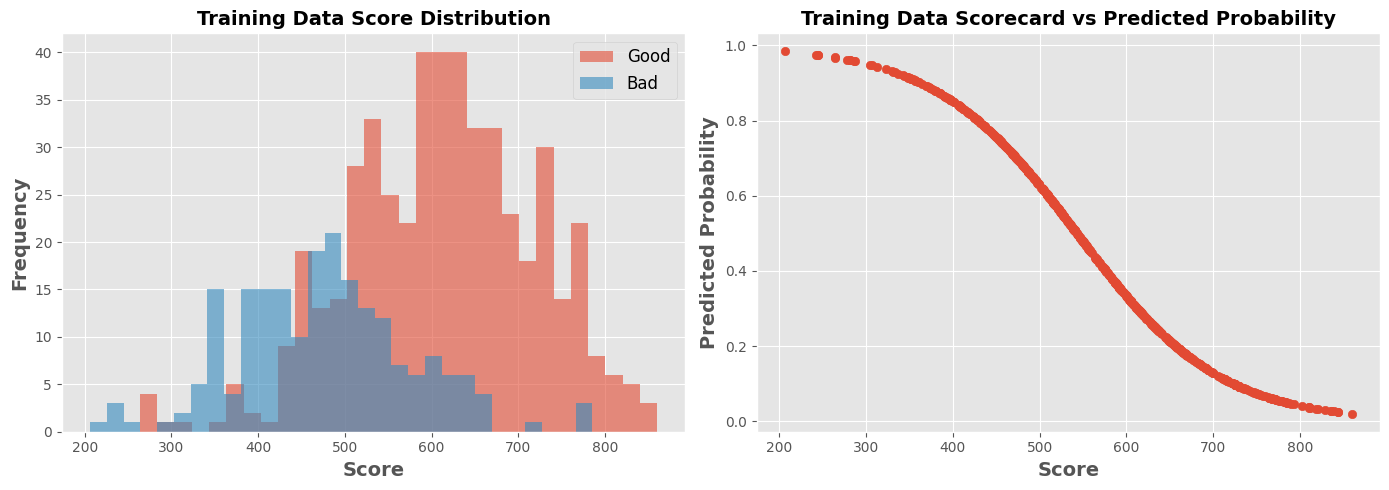

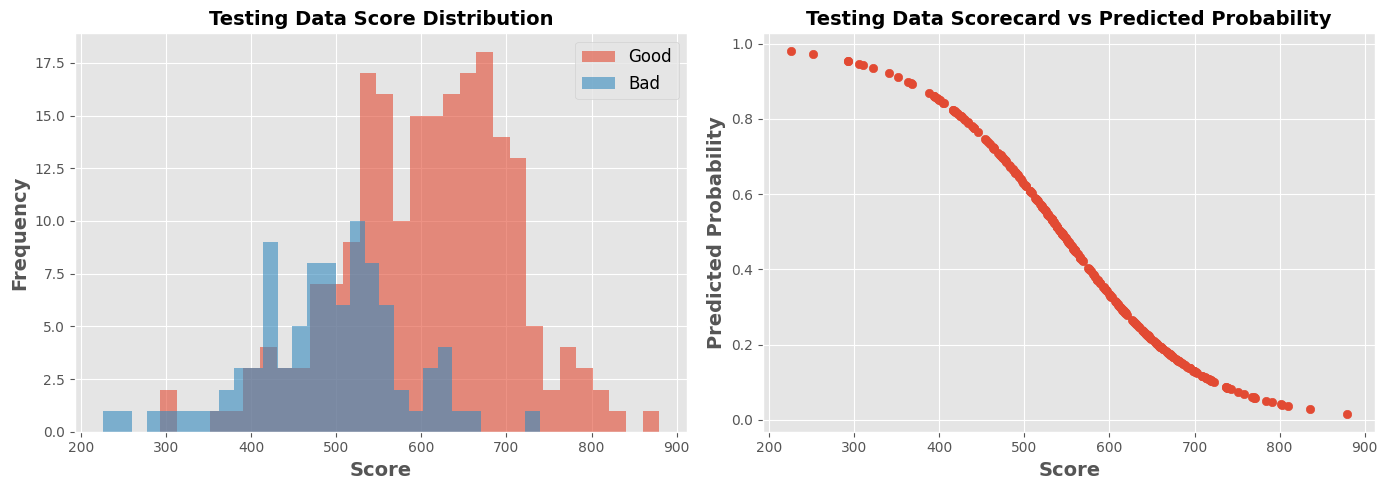

In [ ]:
# Figure Initialization for Distribution data Training
plt.figure(figsize=(14,5))
# Training Data Visualizations: Histogram for Training Scores
plt.subplot(1,2,1)
plt.hist(train_score[y_train == 0],
         alpha=0.6,
         label='Good',
         bins=30)
plt.hist(train_score[y_train == 1],
         alpha=0.6,
         label='Bad',
         bins=30)
plt.title('Training Data Score Distribution',
          fontsize=14,
          fontweight='bold')
plt.legend(loc='upper right',
           fontsize=12)
plt.xlabel('Score',
           fontsize=14,
           fontweight='bold')
plt.ylabel('Frequency',
           fontsize=14,
           fontweight='bold')
plt.grid(axis='y',
         alpha=1)
# plt.show()

# Training Data Visualizations: Scatter for Training Scores
plt.subplot(1,2,2)
plt.scatter(train_score,
            train_pred_prob[:, 1])
plt.title('Training Data Scorecard vs Predicted Probability',
          fontsize=14,
          fontweight='bold')
plt.xlabel('Score',
           fontsize=14,
           fontweight='bold')
plt.ylabel('Predicted Probability',
           fontsize=14,
           fontweight='bold')
plt.tight_layout()
# plt.show()


# Figure Initialization for Distribution data Testing
plt.figure(figsize=(14,5))
# Testing Data Visualizations: Histogram for Testing Scores
plt.subplot(1,2,1)
plt.hist(test_score[y_test == 0],
         alpha= 0.6,
         label= 'Good',
         bins=30)
plt.hist(test_score[y_test == 1],
         alpha= 0.6,
         label= 'Bad',
         bins= 30)
plt.title('Testing Data Score Distribution',
          fontsize=14,
          fontweight='bold')
plt.legend(loc='upper right',
           fontsize=12)
plt.xlabel('Score',
           fontsize=14,
           fontweight='bold')
plt.ylabel('Frequency',
           fontsize=14,
           fontweight='bold')
plt.grid(axis='y',
         alpha=1)

# Testing Data Visualizations: Scatter for Testing Scores
plt.subplot(1,2,2)
plt.scatter(test_score, test_pred_prob[:, 1])
plt.title('Testing Data Scorecard vs Predicted Probability',
          fontsize=14,
          fontweight='bold')
plt.xlabel('Score',
           fontsize=14,
           fontweight='bold')
plt.ylabel('Predicted Probability',
           fontsize=14,
           fontweight='bold')
plt.tight_layout()
plt.show()

## Insights from Training Data Visualization.

* Jika distribusi untuk skor "Baik" dan "Buruk" terpisah dengan baik, ini menunjukkan bahwa model dapat membedakan antara kategori ini secara efektif.

* Jika terdapat tumpang tindih yang signifikan, hal itu mungkin menunjukkan bahwa model tersebut mungkin mengalami kesulitan dalam klasifikasi, sehingga mungkin memerlukan fitur tambahan atau penyesuaian.

* Bentuk setiap histogram juga dapat mengungkap bias apa pun dalam sistem penilaian.

* Tren yang jelas di mana skor yang lebih tinggi mengarah pada probabilitas prediksi yang lebih tinggi menunjukkan kecocokan yang baik dan bahwa model tersebut secara efektif mempelajari hubungan tersebut.

* Diagram sebar tanpa tren yang jelas dapat mengindikasikan masalah pada kemampuan model untuk memprediksi probabilitas secara akurat berdasarkan skor.


## Insights From Testing Data Visualization.

* Membandingkan histogram ini dengan histogram pelatihan dapat mengungkap apakah model tersebut dapat digeneralisasi dengan baik. Perbedaan yang signifikan dapat mengindikasikan overfitting, yaitu model berkinerja baik pada data pelatihan tetapi buruk pada data yang tidak terlihat.

* Distribusi yang serupa dapat menunjukkan bahwa model dapat menerapkan pola yang dipelajari secara efektif.

* Tren kenaikan yang jelas mengindikasikan bahwa model tersebut tergeneralisasi dengan baik dan memelihara hubungan baik antara skor dan probabilitas prediksi.

* Jika penyebarannya tersebar dan tidak memiliki tren yang jelas, hal itu dapat menunjukkan adanya kelemahan potensial dalam model tersebut, yang menunjukkan bahwa penyempurnaan lebih lanjut dapat memberikan manfaat.

## Outcomes.

* **Model Assessment.** Visualization dapat membantu menilai kekuatan prediktif model dan mengidentifikasikan area yang perlu diperbaiki.
* **Generalization.** Dengan membandingkan distribusi pelatihan dan pengujian, dapat mengevaluasi model apakah dapat digeneralisasikan dengan baik ke data yang tidak terlihat.
* **Decision Making.** Insight dari plot ini dapat memandu rekayasa fitur lebih lanjut, pemilihan model, atau hyperparameter tuning.

## Model Assessment and Performance Evaluation Metrics.

In [ ]:
from typing import Union
from scipy import stats
from typing import Tuple

In [ ]:
def gini(y_true: Union[list, np.array], y_pred_proba: Union[list, np.array]) -> float:
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    return 2 * roc_auc - 1

def ks(y_true: Union[list, np.array], y_pred_proba: Union[list, np.array]) -> float:
    y_pred_proba_not_default = y_pred_proba[y_true == 0]
    y_pred_proba_default = y_pred_proba[y_true == 1]
    ks_stat, _ = stats.ks_2samp(y_pred_proba_not_default, y_pred_proba_default)
    return ks_stat

def plot_calibration_curve(y_true: np.array, y_pred_proba: np.array, model_name: str, figsize: Tuple[int, int], n_bins=10) -> plt.Axes:
    prob_true, prob_pred = calibration_curve(y_true, y_pred_proba, n_bins=n_bins)

    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], linestyle="--", label="Perfectly calibrated")
    ax.plot(prob_pred, prob_true, marker="o", label=model_name)

    ax.set_xlabel("Mean predicted probability")
    ax.set_ylabel("Fraction of positives")
    ax.set_title("Calibration plot")
    ax.legend()
    ax.grid(True)

    return fig

def print_side_by_side(dict1: dict, dict2: dict) -> None:
    # Calculate the maximum length of keys in both dictionaries
    max_key_len = max(max(len(key) for key in dict1), max(len(key) for key in dict2))

    # Define the format string for printing, adjusted for floating point numbers
    format_str = "{:<{key_len}}: {:<10} | {:<10}"

    # Print header
    print(format_str.format("Metric", "Train", "Test", key_len=max_key_len))

    # Print separator
    print("-" * (max_key_len + 24))  # Adjusted separator length

    # Print key-value pairs side by side, rounding floats if necessary
    for key in dict1:
        val1 = dict1[key]
        val2 = dict2[key]

        # Check if the values are float, if so, round to 2 decimal places
        if isinstance(val1, float):
            val1 = round(val1, 2)
        if isinstance(val2, float):
            val2 = round(val2, 2)

        # Print the formatted output
        print(format_str.format(key, val1, val2, key_len=max_key_len))

In [ ]:
y_train_pred_prob = scorecard.predict_proba(x_train)[:, -1]
train_evaluation = {"ROC_AUC": roc_auc_score(y_train, y_train_pred_prob),
                    "Precision_AUC": average_precision_score(y_train, y_train_pred_prob),
                    "Gini coefficient": gini(y_train, y_train_pred_prob),
                    "Kolmogorov-Smirnov (KS) statistic": ks(y_train, y_train_pred_prob)}
# print(train_evaluation)

y_test_pred_prob = scorecard.predict_proba(x_test)[:, -1]
test_evaluation = {"ROC_AUC": roc_auc_score(y_test, y_test_pred_prob),
                   "Precision_AUC": average_precision_score(y_test, y_test_pred_prob),
                   "Gini coefficient": gini(y_test, y_test_pred_prob),
                   "Kolmogorov-Smirnov (KS) statistic": ks(y_test, y_test_pred_prob)}
# print(test_evaluation)

print_side_by_side(train_evaluation, test_evaluation)

Metric                           : Train      | Test      
---------------------------------------------------------
ROC_AUC                          : 0.83       | 0.82      
Precision_AUC                    : 0.65       | 0.63      
Gini coefficient                 : 0.66       | 0.64      
Kolmogorov-Smirnov (KS) statistic: 0.53       | 0.52      


In [ ]:
def plot_all_metrics(y_train, y_test, y_train_pred_prob, y_test_pred_prob, model, x_train, x_test):
  fig, axs = plt.subplots(5, 2, figsize=(18, 25))


  # ROC_AUC for training set (top-left)
  plt.sca(axs[0, 0])
  plot_auc_roc(y_train, y_train_pred_prob)
  axs[0, 0].set_title('ROC_AUC for Training Set')

  # ROC_AUC for test set (top-right)
  plt.sca(axs[0, 1])  # Set the current axis to top-right
  plot_auc_roc(y_test, y_test_pred_prob)
  axs[0, 1].set_title('ROC_AUC for Test Set')

  # Precision_AUC for training set (middle-left)
  plt.sca(axs[1, 0])  # Set the current axis to middle-left
  plot_cap(y_train, y_train_pred_prob)
  axs[1, 0].set_title('Precision_AUC for Training Set')

  # Precision_AUC for test set (middle-right)
  plt.sca(axs[1, 1])  # Set the current axis to middle-right
  plot_cap(y_test, y_test_pred_prob)
  axs[1, 1].set_title('Precision_AUC for Test Set')

  # KS for training set (third row, left)
  plt.sca(axs[2, 0])  # Set the current axis to bottom-left
  plot_ks(y_train, y_train_pred_prob)
  axs[2, 0].set_title('Kolmogorov-Smirnov (KS) for Training Set')

  # Kolmogorov-Smirnov (KS) for test set (third row, right)
  plt.sca(axs[2, 1])  # Set the current axis to bottom-right
  plot_ks(y_test, y_test_pred_prob)
  axs[2, 1].set_title('Kolmogorov-Smirnov (KS) for Test Set')

  # Precision-Recall Curve for training set (fourth row, left)
  plt.sca(axs[3, 0])
  precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_prob)
  pr_auc_train = auc(recall_train, precision_train)
  axs[3, 0].plot(recall_train, precision_train, label=f"PR AUC = {pr_auc_train:.2f}")
  axs[3, 0].set_title('Precision-Recall Curve for Training Set')
  axs[3, 0].set_xlabel('Recall')
  axs[3, 0].set_ylabel('Precision')
  axs[3, 0].legend()

  # Precision-Recall Curve for test set (fourth row, right)
  plt.sca(axs[3, 1])
  precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_prob)
  pr_auc_test = auc(recall_test, precision_test)
  axs[3, 1].plot(recall_test, precision_test, label=f"PR AUC = {pr_auc_test:.2f}")
  axs[3, 1].set_title('Precision-Recall Curve for Test Set')
  axs[3, 1].set_xlabel('Recall')
  axs[3, 1].set_ylabel('Precision')
  axs[3, 1].legend()

  # Confusion Matrix for test set (fifth row, left)
  plt.sca(axs[4, 0])
  # Step 1: Predict probabilities for the test set using the scorecard object
  y_pred_proba = model.predict_proba(x_test)[:, 1]

  # Step 2: Binarize the predictions (using a threshold of 0.5 for example)
  threshold = 0.5
  y_pred = (y_pred_proba >= threshold).astype(int)

  # Step 3: Generate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm, display_labels=['Non-Default', 'Default']).plot(cmap='Blues', ax=axs[4, 1])
  axs[4, 1].set_title('Confusion Matrix for Test Set')

  # Confusion Matrix for training set (fifth row, right)
  plt.sca(axs[4, 0])
  y_pred_proba_train = model.predict_proba(x_train)[:, 1]
  y_pred_train = (y_pred_proba_train >= threshold).astype(int)
  cm_train = confusion_matrix(y_train, y_pred_train)
  ConfusionMatrixDisplay(cm_train, display_labels=['Non-Default', 'Default']).plot(cmap='Blues', ax=axs[4, 0])
  axs[4, 0].set_title('Confusion Matrix for Training Set')

  # Adjust layout to prevent overlap
  plt.tight_layout()

  # Display the plots
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

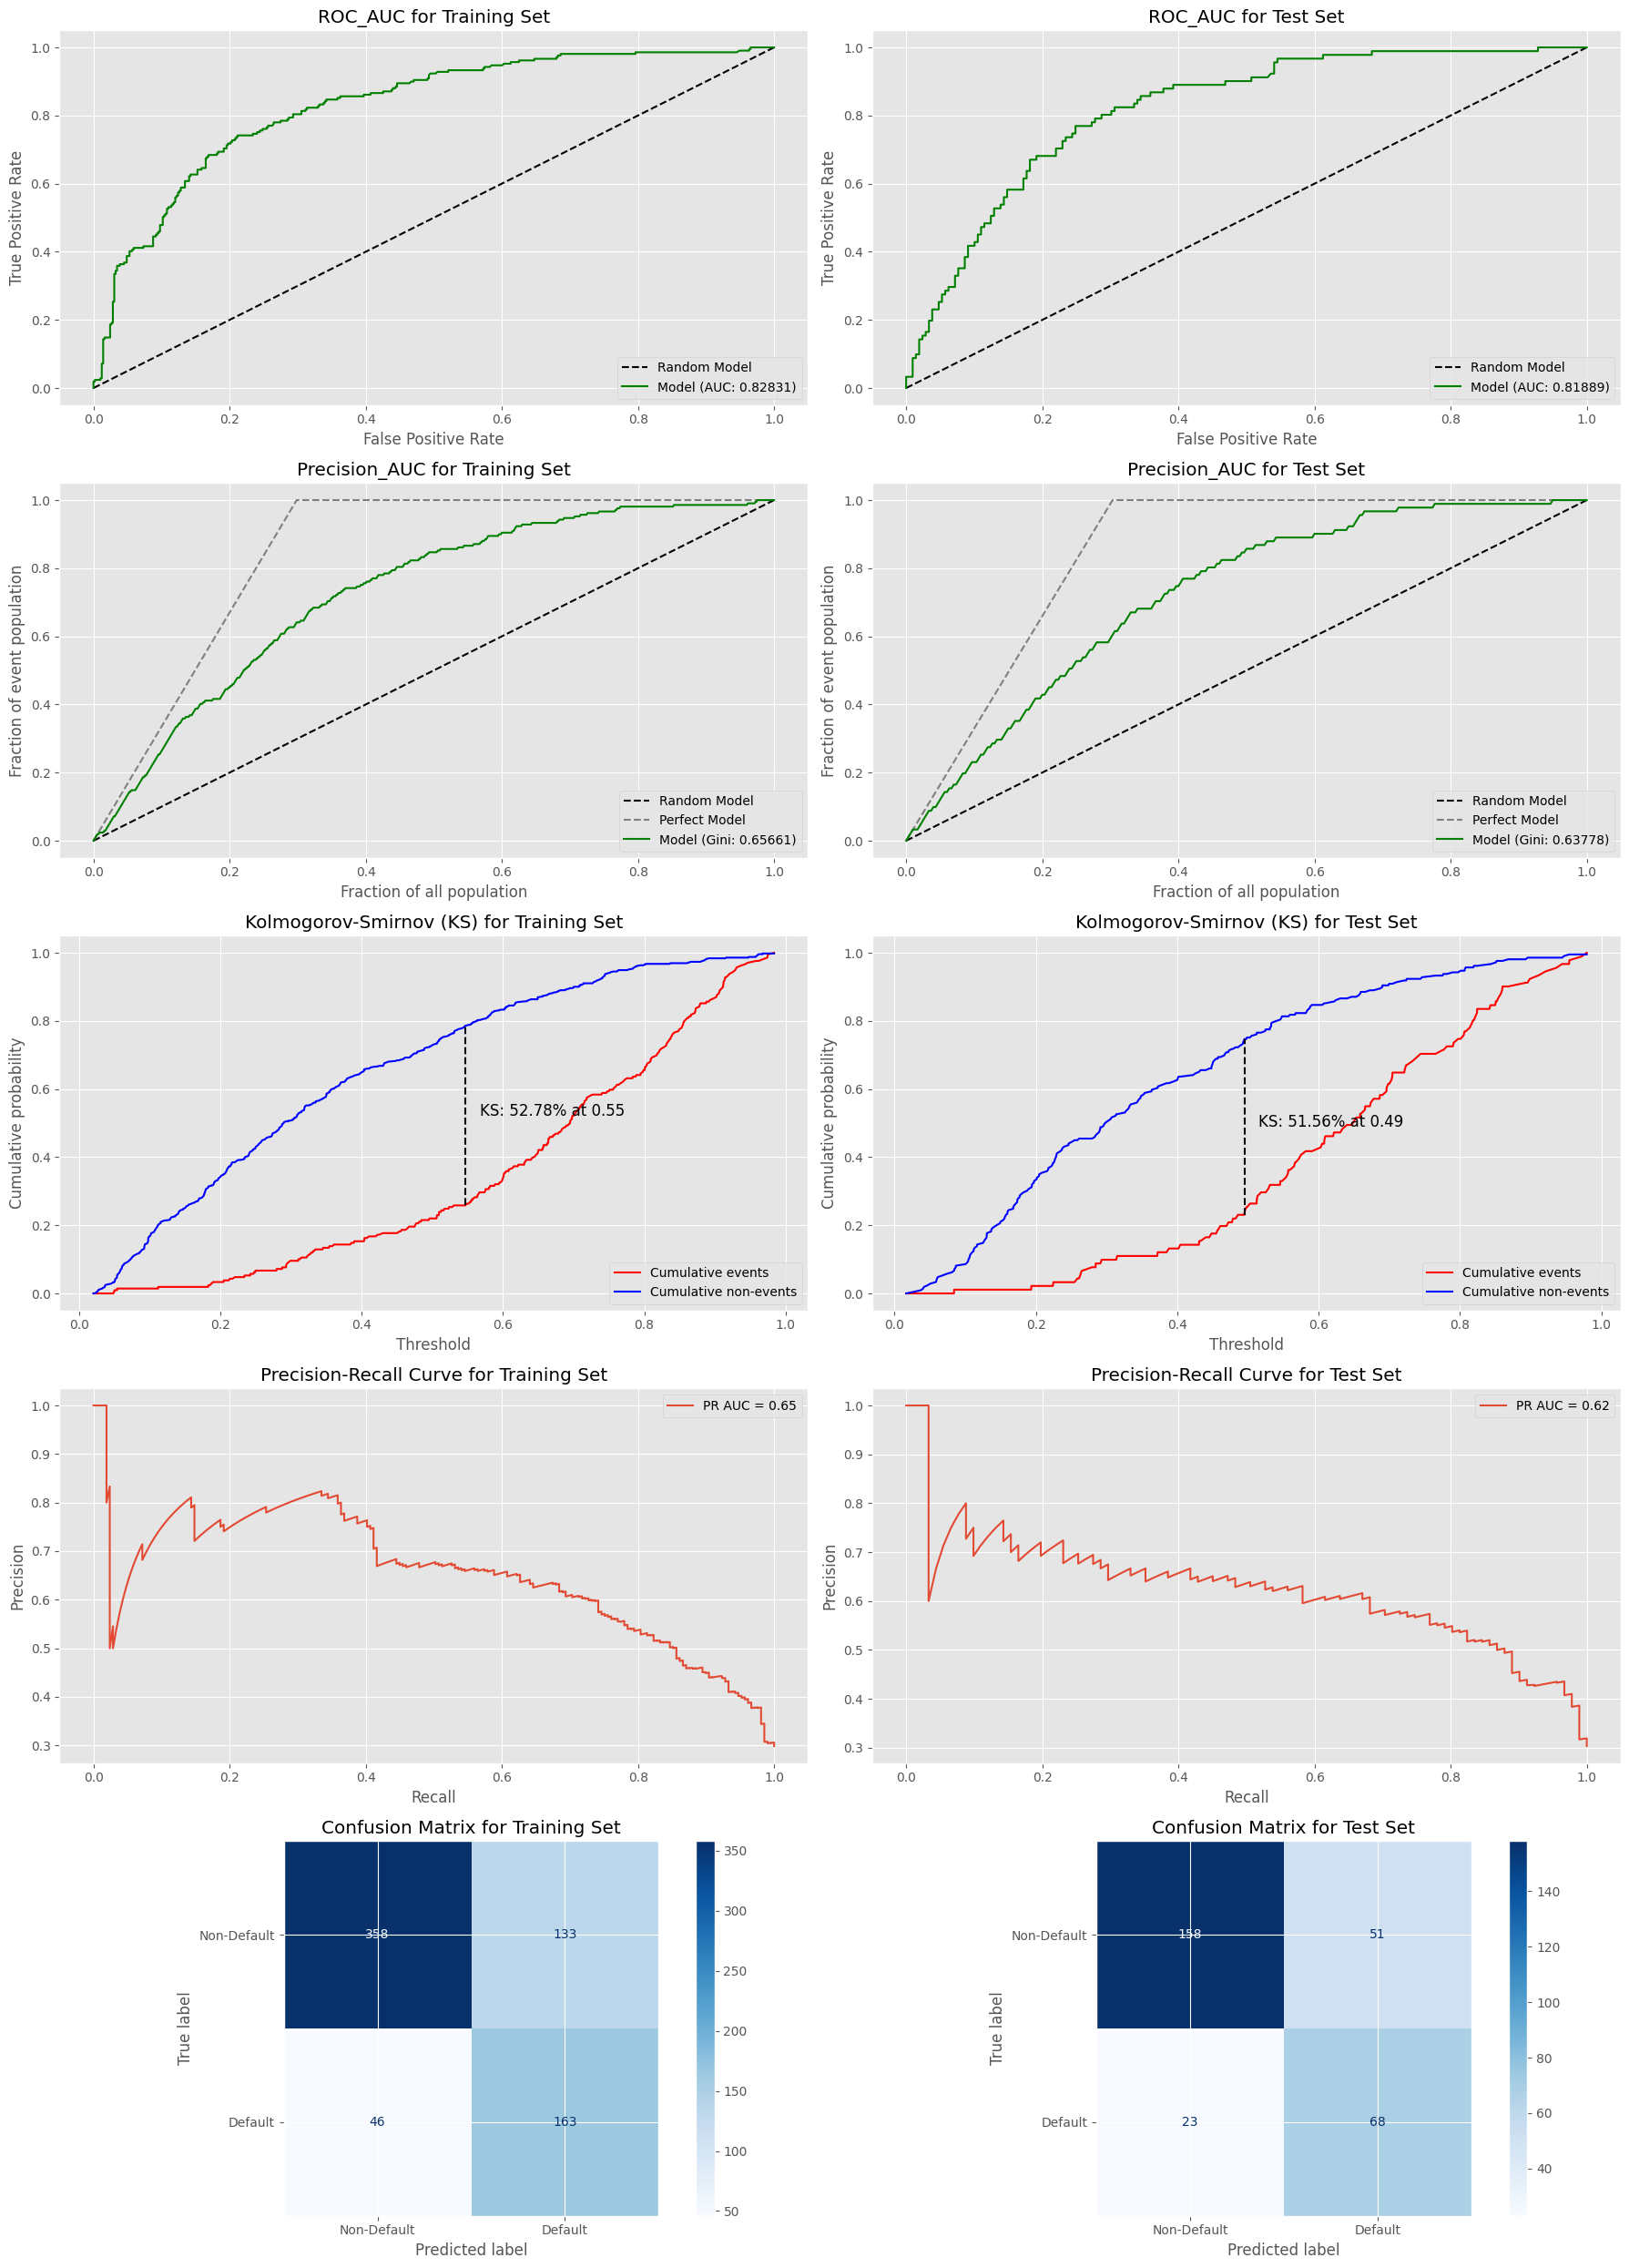

In [ ]:
plot_all_metrics(y_train, y_test, y_train_pred_prob, y_test_pred_prob, scorecard, x_train, x_test)

# Fungsi Untuk Perhitungan Metrik.

1. Gini:
  * Menghitung koefisien Gini, ukuran Inequality, menggunakan kurva ROC.
  * Formula GINI = 2 x ROC_AUC - 1.
  * y_true (label yang benar) dan y_pred_prob (memprediksi probabilitas).

2. Kolmogorov-Smirnov (KS) statistic:
  * Menghitung Kolmogorov-Smirnov (KS) statistic, dalam mengukur perbedaan maksimum antara fungsi distribusi kumulatif (CDF) dari kelompok **default** dan **non-default.**
3. plot_calibration_curve:
  * plot kurva kalibrasi membandingkan probabilitas yang diprediksi (y_pred_proba) untuk kemungkinan sebenarnya dari hasil (y_true).
  * memberikan wawasan tentang seberapa baik probabilitas yang diprediksi dikalibrasi dengan hasil aktual.
4. print_side_by_side:
  * bandingkan metrik (misalnya, ROC_AUC, Precision AUC, koefisien GINI, statistik KS) berdampingan untuk dataset pelatihan dan pengujian.
  * mencetak tabel yang diformat untuk perbandingan yang mudah.

# Model Evaluation and Metrics Storage.

1. Metrik Pelatihan:
  * probabilitas (y_train_pred_prob) dihitung dengan menggunakan model (scorecard.predict_proba(x_train)).
  * metrik seperti ROC_AUC, precision_AUC, Gini Coefficient, dan KS statistic disamping dalam kamus.
2. Metrik uji:
  * Demikian pula, y_test_pred_prob dihitung untuk dataset uji dan metrik disamping.
3. print_side_by_side:
  * menampilkan pelatihan dan menguji metrik berdampingan, menyoroti perbedaan kinerja (overfitting / underfitting).

# Plotting Metrics

1. Kurva ROC:
  * plot kurva receiver operating characteristic (ROC) untuk pelatihan  dalan pengujian.
2. Presisi AUC:
  * Menggunakan profil akurasi kumulatif (CAP) atau pendekatan serupa untuk menganalisis area presisi dibawah kurva.
3. Kolmogorov-Smirnov (KS):
  * Menvisualisasikan statistik KS untuk menilai pemisahan antar kelas.
4. Kurva Recall presisi:
  * Plot trade-off antara presisi dan recall.
  * Area dibawah kurva ini (PR AUC) ditampilkan.
5. Confusion Metrics:
  * Menvisualisasikan hasil klasifikasi menggunakan confussion metrics untuk pelatihan dan pengujian.
 * menampilkan jumlah rue Positives, False Positives, True Negatives, and False Negatives.

# ROC_AUC for Training Set Curve
  * Dari Kurva ROC-AUC yang dihasilkan, menunjukkan trade-off antara True Positive Rate (sensitivity) dan False Positive Rate (1-Specificity) pada berbagai pengaturan pada pengaturan treshold.
  * Pelatihan AUC mencapai skor 81%, menunjukkan kemampuan model yang kuat untuk membedakan antara default dan non-default dalam data pelatihan
  * Skor pengujian AUC mencapai 80%, menunjukkan model berkinerja cukup baik pada data pengujian.

# Curve of The Cumulative Accuracy Profile (CAP)
  * Ini menunjukkan proporsi default aktual yang ditangkap sebagai peningkatan populasi yang ditargetkan. Semakin dekat kurva mendekati model ideal (diwakili oleh garis putus-banjir abu-abu), semakin baik akurasi dalam hasil prediksi.
  * Skor Gini untuk set Pelatihan menunjukkan akurasi 62%, mencerminkan kinerja model yang cukup baik, meskipun masih di bawah standar yang ideal.
  * Skor Gini untuk set Pengujian adalah 61%, sangat cocok dengan set Pelatihan, menunjukkan bahwa model berkinerja memadai dalam membuat prediksi tetapi gagal mencapai kesempurnaan.
  * Skor ini bisa memberikan gambaran seberapa efektif model mengidentifikasi default. Semakin dekat kurva Gini sejalan dengan model ideal, semakin baik mendukung memprioritaskan pelanggan berisiko tinggi untuk pengumpulan atau analisis lebih lanjut.

# Curve of Kolmogorov-Smirnov (KS)

* Kurva ini digunakan untuk membandingkan distribusi kumulatif antara dua kelompok: events (defaulters) dan non-events (non-defaulters). Perbedaan maksimum antara kedua distribusi ini diilustrasikan melalui statistik.
* Skor KS pada data pelatihan adalah 52,78% dengan nilai ambang 55%, menunjukkan perbedaan yang signifikan antara defaulter dan non-defaulter.
* Skor KS pada data pengujian mencapai 51,56% dengan nilai ambang 49%, mengindikasikan kinerja model yang cukup baik, meskipun sedikit lebih rendah dibandingkan dengan data pelatihan.
* Statistik KS ini sangat penting dalam pemodelan risiko kredit, karena membantu mengevaluasi sejauh mana model dapat membedakan antara defaulter dan non-defaulter, yang berperan penting dalam pengambilan keputusan terkait persetujuan atau penolakan pinjaman.

# Precision-Recall Curve

* Kurva Precision-Recall digunakan untuk mengevaluasi kinerja model pada kumpulan data yang tidak seimbang, khususnya dalam memprediksi defaulter (kelas positif). Kurva ini membantu menilai kemampuan model dalam membedakan antara prediksi yang benar dan salah untuk defaulter.
* AUC Precision-Recall pada data pelatihan mencapai 65%, menunjukkan kinerja model yang cukup baik meskipun masih dapat ditingkatkan.
* AUC Precision-Recall pada data pengujian sebesar 62%, mengindikasikan kinerja model yang konsisten tetapi sedikit menurun dibandingkan dengan data pelatihan.
* Semakin besar area di bawah kurva Precision-Recall, semakin baik kemampuan model dalam mengidentifikasi defaulter yang sebenarnya. Hal ini sangat penting untuk meminimalkan kerugian finansial dengan memberikan prediksi yang akurat dan presisi terhadap pelanggan yang berisiko.

In [ ]:
scorecard_table = scorecard.table(style="summary").reset_index(drop=True)

# Export the scorecard table to a CSV file
output_file = "credit_scorecard_points.csv"
scorecard_table.to_csv(output_file, index=False)
print(f"Scorecard table has been successfully saved to '{output_file}'.")

# Display the first 16 rows of the scorecard table for verification
print("\nPreview of the first 16 rows of the scorecard table:")
print(scorecard_table.head(16))


Scorecard table has been successfully saved to 'credit_scorecard_points.csv'.

Preview of the first 16 rows of the scorecard table:
                Variable              Bin      Points
0       checking_balance   (-inf, -40.50)    4.281386
1       checking_balance  [-40.50, 12.00)   18.045464
2       checking_balance   [12.00, 97.12)   44.625329
3       checking_balance  [97.12, 101.00)  137.765620
4       checking_balance    [101.00, inf)   61.042267
5       checking_balance          Special   67.931293
6       checking_balance          Missing   67.931293
7   months_loan_duration     (-inf, 7.50)  114.473077
8   months_loan_duration    [7.50, 11.50)   82.290155
9   months_loan_duration   [11.50, 17.00)   76.935828
10  months_loan_duration   [17.00, 26.50)   68.967986
11  months_loan_duration   [26.50, 33.00)   65.965163
12  months_loan_duration   [33.00, 43.50)   44.903193
13  months_loan_duration     [43.50, inf)   24.996696
14  months_loan_duration          Special   67.931293
15  

In [ ]:
for variable in scorecard_table["Variable"].unique():
    # Filter rows corresponding to the current variable
    filtered_table = scorecard_table[scorecard_table["Variable"] == variable]

    # Display the variable name and the filtered rows
    print(f"\nVariable: {variable}")
    display(filtered_table)



Variable: checking_balance


Variable              Bin      Points
0  checking_balance   (-inf, -40.50)    4.281386
1  checking_balance  [-40.50, 12.00)   18.045464
2  checking_balance   [12.00, 97.12)   44.625329
3  checking_balance  [97.12, 101.00)  137.765620
4  checking_balance    [101.00, inf)   61.042267
5  checking_balance          Special   67.931293
6  checking_balance          Missing   67.931293


Variable: months_loan_duration


Variable             Bin      Points
7   months_loan_duration    (-inf, 7.50)  114.473077
8   months_loan_duration   [7.50, 11.50)   82.290155
9   months_loan_duration  [11.50, 17.00)   76.935828
10  months_loan_duration  [17.00, 26.50)   68.967986
11  months_loan_duration  [26.50, 33.00)   65.965163
12  months_loan_duration  [33.00, 43.50)   44.903193
13  months_loan_duration    [43.50, inf)   24.996696
14  months_loan_duration         Special   67.931293
15  months_loan_duration         Missing   67.931293


Variable: credit_history


Variable                                     Bin      Points
16  credit_history                              [critical]  122.612240
17  credit_history                               [delayed]   74.591407
18  credit_history                                [repaid]   57.785833
19  credit_history  [fully repaid this bank, fully repaid]  -10.676581
20  credit_history                                 Special   67.931293
21  credit_history                                 Missing   67.931293


Variable: purpose


Variable                               Bin      Points
22  purpose          [retraining, car (used)]  121.200218
23  purpose                        [radio/tv]  107.221933
24  purpose              [furniture, repairs]   73.487893
25  purpose                        [business]   38.553989
26  purpose  [car (new), domestic appliances]   34.687637
27  purpose               [education, others]    2.607060
28  purpose                           Special   67.931293
29  purpose                           Missing   67.931293


Variable: amount


Variable                 Bin      Points
30   amount     (-inf, 1387.00)   59.224521
31   amount  [1387.00, 3554.00)   93.021286
32   amount  [3554.00, 3913.50)  175.763716
33   amount  [3913.50, 7839.50)   49.847007
34   amount      [7839.50, inf)   -8.378780
35   amount             Special   67.931293
36   amount             Missing   67.931293


Variable: savings_balance


Variable               Bin      Points
37  savings_balance     (-inf, 17.50)   70.412252
38  savings_balance    [17.50, 44.50)   46.775311
39  savings_balance    [44.50, 55.50)   20.740500
40  savings_balance    [55.50, 90.50)   61.360948
41  savings_balance   [90.50, 480.50)   69.188760
42  savings_balance  [480.50, 814.00)   90.475305
43  savings_balance     [814.00, inf)  123.832567
44  savings_balance           Special   67.931293
45  savings_balance           Missing   67.931293


Variable: saving_to_amount_ration


Variable           Bin     Points
46  saving_to_amount_ration  (-inf, 0.00)  49.926177
47  saving_to_amount_ration  [0.00, 0.01)  58.968754
48  saving_to_amount_ration  [0.01, 0.05)  66.071154
49  saving_to_amount_ration  [0.05, 0.09)  68.852723
50  saving_to_amount_ration  [0.09, 0.18)  75.050282
51  saving_to_amount_ration  [0.18, 0.98)  76.518857
52  saving_to_amount_ration   [0.98, inf)  97.053414
53  saving_to_amount_ration       Special  67.931293
54  saving_to_amount_ration       Missing  67.931293


Variable: loan_duration_to_employment_length


Variable            Bin      Points
55  loan_duration_to_employment_length   (-inf, 1.27)  107.299149
56  loan_duration_to_employment_length   [1.27, 2.43)   93.448919
57  loan_duration_to_employment_length   [2.43, 3.40)   81.879038
58  loan_duration_to_employment_length   [3.40, 4.35)   75.749555
59  loan_duration_to_employment_length  [4.35, 12.26)   60.297183
60  loan_duration_to_employment_length   [12.26, inf)   16.503542
61  loan_duration_to_employment_length        Special   67.931293
62  loan_duration_to_employment_length        Missing   67.931293

In [ ]:
# Descriptions for credit levels based on FICO scores
credit_level_descriptions = {
    1: "Very Poor",
    2: "Poor",
    3: "Below Average",
    4: "Average",
    5: "Above Average",
    6: "Good",
    7: "Very Good",
    8: "Excellent",
    9: "Exceptional",
}

def get_credit_levels(
    df: pd.DataFrame,
    target_col: str = "credit_score",
    left_bound: int = -np.inf,
    level_1: int = 350,
    level_2: int = 400,
    level_3: int = 450,
    level_4: int = 500,
    level_5: int = 550,
    level_6: int = 600,
    level_7: int = 650,
    level_8: int = 700,
    right_bound: int = np.inf
) -> pd.DataFrame:
    """
    Categorize FICO credit scores into levels and add descriptions to the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing credit scores.
        target_col (str): Name of the column containing FICO credit scores.
        left_bound (int): Minimum possible FICO credit score.
        level_1 (int): Upper bound for credit level 1.
        level_2 (int): Upper bound for credit level 2.
        level_3 (int): Upper bound for credit level 3.
        level_4 (int): Upper bound for credit level 4.
        level_5 (int): Upper bound for credit level 5.
        level_6 (int): Upper bound for credit level 6.
        level_7 (int): Upper bound for credit level 7.
        level_8 (int): Upper bound for credit level 8.
        right_bound (int): Maximum possible FICO credit score.

    Returns:
        pd.DataFrame: The updated DataFrame with credit levels, bounds, and descriptions.
    """
    # Define conditions for each credit level
    conditions = [
        (df[target_col] > left_bound) & (df[target_col] <= level_1),
        (df[target_col] > level_1) & (df[target_col] <= level_2),
        (df[target_col] > level_2) & (df[target_col] <= level_3),
        (df[target_col] > level_3) & (df[target_col] <= level_4),
        (df[target_col] > level_4) & (df[target_col] <= level_5),
        (df[target_col] > level_5) & (df[target_col] <= level_6),
        (df[target_col] > level_6) & (df[target_col] <= level_7),
        (df[target_col] > level_7) & (df[target_col] <= level_8),
        (df[target_col] > level_8) & (df[target_col] <= right_bound),
    ]

    # Define choices for credit level, lower bounds, and upper bounds
    level_choices = list(credit_level_descriptions.keys())
    lower_bound_choices = [left_bound, level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8]
    upper_bound_choices = [level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8, right_bound]

    # Assign credit levels, bounds, and descriptions to new columns
    df["credit_level"] = np.select(conditions, level_choices)
    df["credit_lower_bound"] = np.select(conditions, lower_bound_choices)
    df["credit_upper_bound"] = np.select(conditions, upper_bound_choices)
    df["credit_description"] = df["credit_level"].map(credit_level_descriptions)

    return df

* Penamaan Variabel: Diganti namanya credit_levels_decriptionsuntuk credit_level_descriptionsuntuk keterbacaan dan keselarasan yang lebih baik dengan konvensi Python.
* Dokumenter terperinci: Memperluas dan mengklarifikasi docstring, termasuk informasi tentang setiap parameter dan DataFrame yang dikembalikan.
* Deskripsi Kolom: Menambahkan kolom untuk memetakan tingkat kredit ke deskripsi tekstual mereka (credit_description).
* Kode Keterbacaan: Peningkatan pemformatan dan penamaan variabel yang konsisten untuk kejelasan.
* Type Hints: Termasuk jenis petunjuk untuk argumen fungsi untuk meningkatkan pemeliharaan kode dan kompatibilitas dengan IDE modern.
* Skalabilitas: Digunakan list()dan pemetaan, sehingga lebih mudah untuk memperluas atau memodifikasi tingkat dan deskripsi di masa depan.

In [ ]:
# Separate features and target variable
features = df2.drop(columns=['default'])  # Exclude the target variable
target = df2['default']  # Extract the target variable (encoded)

# Prepare input data for scoring
input_data = features.copy()
input_data['default'] = target  # Add target variable back to the input data

# Calculate FICO scores using the scorecard
credit_scores = scorecard.score(input_data).round()  # Generate and round credit scores

# Create a DataFrame for credit scores and interpret their levels
credit_scores_df = pd.DataFrame({"credit_score": credit_scores})
credit_scores_df = get_credit_levels(credit_scores_df, target_col="credit_score")

# Add descriptive information to the DataFrame
credit_scores_df["credit_description"] = credit_scores_df["credit_level"].map(credit_level_descriptions)
credit_scores_df["loan_status"] = target.values  # Attach original loan status

# Reset the index for a cleaner presentation
credit_scores_df.reset_index(drop=True, inplace=True)


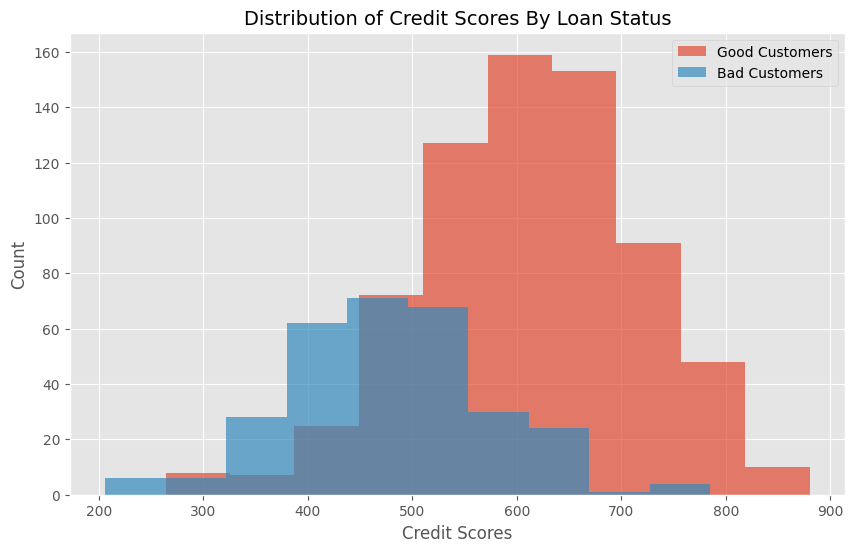

In [ ]:
plt.figure(figsize=(10, 6))
credit_scores_df.loc[credit_scores_df["loan_status"]==0, "credit_score"].hist(alpha=0.7, label="Good Customers")
credit_scores_df.loc[credit_scores_df["loan_status"]==1, "credit_score"].hist(alpha=0.7, label="Bad Customers")
plt.title("Distribution of Credit Scores By Loan Status", fontsize=14)
plt.xlabel("Credit Scores", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.savefig("distribution_of_credit_scores_by_loan_status.png", bbox_inches = "tight")
plt.show()

In [ ]:
# Create the report dataframe
report_df = credit_scores_df[["credit_score", "credit_level", "credit_lower_bound", "credit_upper_bound", "credit_description", "loan_status"]]

# Aggregate data by credit level and loan status
report_agg_df = report_df.groupby(
    ["credit_level", "credit_lower_bound", "credit_upper_bound", "credit_description"]) ["loan_status"].value_counts().unstack().reset_index()

# Rename columns for better clarity
report_agg_df = report_agg_df.rename(columns={
    0: "Good Customers",
    1: "Bad Customers",
    "credit_level": "Credit Level",
    "credit_lower_bound": "Credit Lower Bound",
    "credit_upper_bound": "Credit Upper Bound",
    "credit_description": "Credit Description"}).fillna(0)

# Remove the axis name for a cleaner output
report_agg_df = report_agg_df.rename_axis(None, axis=1)

# Add total number of customers (Good + Bad) for each credit level
report_agg_df["Customers"] = report_agg_df["Good Customers"] + report_agg_df["Bad Customers"]

# Calculate proportions for each credit level
report_agg_df["Customers Rate"] = (report_agg_df["Customers"] / report_agg_df["Customers"].sum()) * 100
report_agg_df["Default Rate"] = (report_agg_df["Bad Customers"] / report_agg_df["Customers"]) * 100

# Reverse cumulative sum calculations
report_agg_df["Reverse Cumulative Customers"] = report_agg_df["Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Good Customers"] = report_agg_df["Good Customers"][::-1].cumsum()
report_agg_df["Reverse Cumulative Bad Customers"] = report_agg_df["Bad Customers"][::-1].cumsum()

# Calculate coverage percentages
report_agg_df["Good Customers Coverage"] = report_agg_df["Reverse Cumulative Good Customers"] / report_agg_df["Good Customers"].sum()
report_agg_df["Loss Coverage"] = report_agg_df["Reverse Cumulative Bad Customers"] / report_agg_df["Reverse Cumulative Customers"]

In [ ]:
report_agg_df = report_agg_df[["Credit Level", "Credit Lower Bound",
                               "Credit Upper Bound", "Credit Description",
                               "Customers", "Customers Rate",
                               "Good Customers", "Bad Customers",
                               "Default Rate", "Good Customers Coverage",
                               "Loss Coverage"]]
report_agg_df

Credit Level  Credit Lower Bound  Credit Upper Bound Credit Description  \
0             1                -inf               350.0          Very Poor   
1             2               350.0               400.0               Poor   
2             3               400.0               450.0      Below Average   
3             4               450.0               500.0            Average   
4             5               500.0               550.0      Above Average   
5             6               550.0               600.0               Good   
6             7               600.0               650.0          Very Good   
7             8               650.0               700.0          Excellent   
8             9               700.0                 inf        Exceptional   

   Customers  Customers Rate  Good Customers  Bad Customers  Default Rate  \
0         33             3.3               9             24     72.727273   
1         47             4.7              10             37     78.723404   
2         72             7.2              22             50     69.444444   
3        124            12.4              57             67     54.032258   
4        166            16.6             105             61     36.746988   
5        132            13.2             107             25     18.939394   
6        157            15.7             131             26     16.560510   
7        124            12.4             119              5      4.032258   
8        145            14.5             140              5      3.448276   

   Good Customers Coverage  Loss Coverage  
0                 1.000000       0.300000  
1                 0.987143       0.285419  
2                 0.972857       0.259783  
3                 0.941429       0.222877  
4                 0.860000       0.168508  
5                 0.710000       0.109319  
6                 0.557143       0.084507  
7                 0.370000       0.037175  
8                 0.200000       0.034483

* Credit Level: Menggambarkan berbagai tingkatan kelayakan kredit berdasarkan skor kredit pelanggan.
* Credit Lower Bound: Menentukan batas bawah rentang skor untuk setiap tingkat kredit. Contohnya, tingkat kredit "Very Poor" mencakup skor mulai dari minus tak terhingga hingga 350.
* Credit Description: Memberikan deskripsi atau label yang relevan untuk setiap tingkat kredit, seperti "Very Poor", "Exceptional".
* Customers: Jumlah total pelanggan yang termasuk dalam setiap tingkat kredit tertentu.
* Customer rate: Persentase pelanggan pada setiap tingkat kredit relatif terhadap jumlah total pelanggan, menunjukkan distribusi pelanggan di seluruh tingkatan.
* Good Customers dan Bad Customers: Jumlah pelanggan pada setiap tingkat kredit yang dikategorikan sebagai:
  * Good Customers: Pelanggan dengan risiko kredit rendah.
  * Bad Customers: Pelanggan dengan risiko kredit tinggi.
* Default rate: Persentase pelanggan pada setiap tingkat kredit yang gagal memenuhi kewajiban pembayaran, merepresentasikan risiko kredit pada tingkatan tersebut.
* Good Customers Coverage: Persentase kumulatif pelanggan baik (berisiko rendah) yang tercakup mulai dari tingkat kredit tertinggi ke tingkat kredit terendah.
* Loss Coverage: Persentase kumulatif potensi kerugian yang bersedia diterima, dihitung mulai dari tingkat kredit tertentu hingga tingkat kredit tertinggi, relevan untuk menilai eksposur risiko pinjaman.